In [ ]:
# Bibliotheken installieren und Zugriffe gewähren
import ee
import geemap
import folium
from datetime import datetime
import geopandas as gpd
from shapely.geometry import mapping
import pandas as pd
import matplotlib.pyplot as plt


ee.Authenticate()
ee.Initialize(project="ee-sarahheinz0405")

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Bei wieviel Wolkenbedeckung gibt es wieviele Szenen?

import ee
import geemap
import geopandas as gpd
from shapely.geometry import mapping

# Authentifizierung und Initialisierung von Earth Engine
ee.Authenticate()
ee.Initialize(project="ee-sarahheinz0405")

# Shapefile-Pfade
noerdlingen_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Nördlingen_Gerenze_shp.shp'
kempten_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Kempten (Allgäu) .shp'
ingolstadt_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Ingolstadt .shp'

# Zeitraum
start_date = '2022-09-01' # für alle 4 Jahreszeiten durchführen
end_date = '2022-11-30'

# Cloud Cover-Werte
cloud_cover_values = [5, 10, 20, 30, 40, 50]

# Funktion zum Laden der Region aus Shapefile
def load_region(shapefile_path):
    gdf = gpd.read_file(shapefile_path)
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs("EPSG:4326")
    return ee.Geometry(mapping(gdf.unary_union))

# Städte und Shapefiles
cities = {
    'Nördlingen': noerdlingen_shapefile,
    'Kempten': kempten_shapefile,
    'Ingolstadt': ingolstadt_shapefile
}

# Ergebnisse für jede Stadt und Cloud Cover-Wert berechnen
results = {}
for city_name, shapefile_path in cities.items():
    region = load_region(shapefile_path)
    results[city_name] = {}
    for cloud_cover in cloud_cover_values:
        landsat = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
            .filterDate(start_date, end_date) \
            .filterBounds(region) \
            .filter(ee.Filter.lt('CLOUD_COVER', cloud_cover))
        num_scenes = landsat.size().getInfo()
        results[city_name][cloud_cover] = num_scenes

# Ergebnisse in Tabelle ausgeben
print("Anzahl der Szenen für verschiedene Cloud Cover-Werte:")
print("Stadt\t| 5%\t| 10%\t| 20%\t| 30%\t| 40%\t| 50%")
print("-" * 50)
for city_name, data in results.items():
    row = f"{city_name}\t|"
    for cloud_cover in cloud_cover_values:
        row += f" {data[cloud_cover]}\t|"
    print(row)

<ipython-input-2-ae6c145325ca>:29: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  return ee.Geometry(mapping(gdf.unary_union))
<ipython-input-2-ae6c145325ca>:29: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  return ee.Geometry(mapping(gdf.unary_union))
<ipython-input-2-ae6c145325ca>:29: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  return ee.Geometry(mapping(gdf.unary_union))


Anzahl der Szenen für verschiedene Cloud Cover-Werte:
Stadt	| 5%	| 10%	| 20%	| 30%	| 40%	| 50%
--------------------------------------------------
Nördlingen	| 0	| 0	| 0	| 1	| 2	| 2	|
Kempten	| 0	| 1	| 1	| 3	| 4	| 4	|
Ingolstadt	| 0	| 0	| 0	| 1	| 2	| 2	|


In [ ]:
# Aufnahmedatum der oben ausgegebenen Szenen identifizieren

# Shapefile-Pfade
noerdlingen_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Nördlingen_Gerenze_shp.shp'
kempten_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Kempten (Allgäu) .shp'
ingolstadt_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Ingolstadt .shp'

# Zeitraum (Herbst)
start_date = '2022-09-01'
end_date = '2022-11-30'

# Cloud Cover => anpassen
cloud_cover = 40

# Funktion zum Laden der Region aus Shapefile
def load_region(shapefile_path):
    gdf = gpd.read_file(shapefile_path)
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs("EPSG:4326")
    return ee.Geometry(mapping(gdf.unary_union))

# Städte und Shapefiles
cities = {
    'Nördlingen': noerdlingen_shapefile,
    'Kempten': kempten_shapefile,
    'Ingolstadt': ingolstadt_shapefile
}

# Ergebnisse für jede Stadt berechnen
for city_name, shapefile_path in cities.items():
    region = load_region(shapefile_path)
    landsat = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
        .filterDate(start_date, end_date) \
        .filterBounds(region) \
        .filter(ee.Filter.lt('CLOUD_COVER', cloud_cover))


    # Aufnahmedaten der Szenen abrufen
    scene_dates = landsat.map(lambda image: image.set('date', image.date().format('YYYY-MM-dd'))).distinct('date').aggregate_array('date').getInfo()

    # Ergebnisse ausgeben (innerhalb der Schleife)
    print(f"Stadt: {city_name}")
    print(f"Aufnahmedaten der Szenen (Cloud Cover < {cloud_cover}%): {scene_dates}")
    print("-" * 30)

<ipython-input-3-5284851db5d5>:20: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  return ee.Geometry(mapping(gdf.unary_union))


Stadt: Nördlingen
Aufnahmedaten der Szenen (Cloud Cover < 40%): ['2022-09-04', '2022-10-29']
------------------------------


<ipython-input-3-5284851db5d5>:20: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  return ee.Geometry(mapping(gdf.unary_union))


Stadt: Kempten
Aufnahmedaten der Szenen (Cloud Cover < 40%): ['2022-09-04', '2022-10-06', '2022-11-23', '2022-10-29']
------------------------------
Stadt: Ingolstadt
Aufnahmedaten der Szenen (Cloud Cover < 40%): ['2022-09-04', '2022-10-29']
------------------------------


<ipython-input-3-5284851db5d5>:20: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  return ee.Geometry(mapping(gdf.unary_union))


# mittlere LST Sommer 2022

In [ ]:
def maskClouds(image):
    # QA_PIXEL-Band auswählen
    qa_band = image.select('QA_PIXEL')

    # Bitmasken für Wolkenschatten (Bit 3) und Wolken (Bit 5) definieren
    cloud_shadow_bitmask = (1 << 3)  # 00001000 = 8
    cloud_bitmask = (1 << 5)         # 00100000 = 32

    # Prüfen, ob die relevanten Bits nicht gesetzt sind (d.h. wolkenfreie Pixel)
    mask = qa_band.bitwiseAnd(cloud_shadow_bitmask).eq(0).And(
           qa_band.bitwiseAnd(cloud_bitmask).eq(0))

    # Maske auf das Bild anwenden
    return image.updateMask(mask)


In [ ]:
# Funktion zur Wolkenmaskierung
def maskClouds(image):
    qa_band = image.select('QA_PIXEL') # QA_Pixel ist Band, das Informationen über Qualität des Bilds (Quality Assurance Band) enthält, also auch Wolken,...
    cloud_mask = qa_band.bitwiseAnd(int('11111', 2)).eq(0)  # prüft welche Bits in Pixel gesetzt sind und stellt sicher, dass nur Pixel beibehalten werden, bei denen die resultierenden Bits 0 sind (d. h. wolkenfreie Pixel)
    return image.updateMask(cloud_mask)


zwei verschiedene Methoden: Methode 1 maskiert *nur Schatten und Wolken*, Methode 2 auch andere *potentielle Störfaktoren*, z.B Schnee oder Wasserdampf,...

aber in dem Fall nur Wolken und Schatten benötigt, weil z.B Schnee ja realer Einfluss auf LST => **Methode 1** = gezieltere Maskierung, wird weiterhin verwendet !

In [ ]:
def maskClouds(image):
    # QA_PIXEL-Band auswählen
    qa_band = image.select('QA_PIXEL')

    # Bitmasken für Wolkenschatten (Bit 3) und Wolken (Bit 5) definieren
    cloud_shadow_bitmask = (1 << 3)  # 00001000 = 8
    cloud_bitmask = (1 << 5)         # 00100000 = 32

    # Prüfen, ob die relevanten Bits nicht gesetzt sind (d.h. wolkenfreie Pixel)
    mask = qa_band.bitwiseAnd(cloud_shadow_bitmask).eq(0).And(
           qa_band.bitwiseAnd(cloud_bitmask).eq(0))

    # Maske auf das Bild anwenden
    return image.updateMask(mask)

# Funktion zur Berechnung der LST
def calculateLST(image):
    kelvin = image.select('ST_B10').multiply(0.00341802).add(149.0)  # Radiance -> Kelvin
    lst_celsius = kelvin.subtract(273.15).rename('LST_Celsius')  # Kelvin -> Celsius
    return image.addBands(lst_celsius)


# FUNKTION ZUR ANALYSE DER LST FÜR EINE REGION

def analyze_lst(region_shapefile, start_date, end_date, region_name):
    # Region aus Shapefile laden
    gdf = gpd.read_file(region_shapefile)
    region = ee.Geometry(mapping(gdf.unary_union))

     # CRS sicherstellen (WGS84)
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs("EPSG:4326")  # In WGS84 projizieren

    region = ee.Geometry(mapping(gdf.unary_union))

    # Landsat 8-Daten abrufen und verarbeiten
    landsat = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
        .filterDate(start_date, end_date) \
        .filterBounds(region) \
          .filter(ee.Filter.lt('CLOUD_COVER', 5)) \
        .map(maskClouds) \
        .map(calculateLST)
   # hier wird Cloud Cover Filterung entfernt oder bearbeitet

    # Mittlere LST berechnen und auf die Region zuschneiden
    mean_lst = landsat.select('LST_Celsius').mean().clip(region)

    # Visualisierung
    lst_palette = ['blue', 'cyan', 'green', 'yellow', 'orange', 'red']
    Map = geemap.Map()
    Map.centerObject(region, 12)
    Map.addLayer(mean_lst, {'min': 5, 'max': 40, 'palette': lst_palette}, f'Mean LST {region_name}')
    Map.addLayer(region, {}, f'{region_name} Boundary')
    Map.add_colorbar(
        vis_params={'min': 5, 'max': 40, 'palette': lst_palette},
        label="Land Surface Temperature Summer 2022 (°C)"
    )
    Map

    return mean_lst # mean_lst zurückgeben


# Shapefile-Pfade
noerdlingen_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Nördlingen_Gerenze_shp.shp'
kempten_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Kempten (Allgäu) .shp'
ingolstadt_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Ingolstadt .shp'

# Zeitraum
start_date = '2022-06-01'
end_date = '2022-08-31'

# Analyse für jede Region durchführen und Ergebnisse speichern
results_summer = {
    'Nördlingen': analyze_lst(noerdlingen_shapefile, start_date, end_date, 'Nördlingen'),
    'Kempten': analyze_lst(kempten_shapefile, start_date, end_date, 'Kempten'),
    'Ingolstadt': analyze_lst(ingolstadt_shapefile, start_date, end_date, 'Ingolstadt')
}

# Karte erstellen und Ergebnisse hinzufügen
Map = geemap.Map()

lst_palette = ['blue', 'cyan', 'green', 'yellow', 'orange', 'red']

for region_name, mean_lst_image in results_summer.items():
    Map.addLayer(mean_lst_image, {'min': 5, 'max': 40, 'palette': lst_palette}, f'Mean LST {region_name}')

    # Shapefiles laden um Stadtgrenzen darzustellen
    gdf = gpd.read_file(noerdlingen_shapefile if region_name == 'Nördlingen' else
                        kempten_shapefile if region_name == 'Kempten' else
                        ingolstadt_shapefile)
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs("EPSG:4326")
    region_boundary = ee.Geometry(mapping(gdf.unary_union))
    Map.addLayer(region_boundary, {}, f'{region_name} Boundary')

Map.add_colorbar(vis_params={'min': 5, 'max': 40, 'palette': lst_palette}, label="Land Surface Temperature Summer 2022 (°C)")
Map # Display the map


# Dieses Ergebnis hat auf <5% Wolkenbedeckung gefiltert und zudem die Wolkenpixel maskiert. Ausreißer wurden NICHT gefiltert.

<ipython-input-6-97883381ebac>:28: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  region = ee.Geometry(mapping(gdf.unary_union))
<ipython-input-6-97883381ebac>:34: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  region = ee.Geometry(mapping(gdf.unary_union))


Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [ ]:
# Ergebnisse als png in Drive speichern

# Funktion zum Exportieren als PNG
def export_as_GeoTIFF(image, region, filename):
    # Replace invalid characters in the filename for the description
    description = filename.replace("ö", "oe").replace("ä", "ae").replace("ü", "ue")
    task = ee.batch.Export.image.toDrive(
        image=image,
        description=description,  # Use the modified filename as the description
        folder='/content/drive/MyDrive/Daten BA /erstellte Dateien mit colab/LST Exporte',  # Optional: Ordner in Google Drive
        scale=30,
        region=region.bounds(),
        fileFormat='GeoTIFF'
    )
    task.start()
    print(f'Export gestartet: {filename}')

# Exportiere die Ergebnisse für jede Stadt
for city_name, mean_lst_image in results.items():  # Only unpack city_name and mean_lst_image
    # Lade das Shapefile für die jeweilige Region
    shapefile_path = noerdlingen_shapefile if city_name == 'Nördlingen' else \
                     kempten_shapefile if city_name == 'Kempten' else \
                     ingolstadt_shapefile
    gdf = gpd.read_file(shapefile_path)

    # CRS sicherstellen (WGS84)
    if gdf.crs != "EPSG:3857":
        gdf = gdf.to_crs("EPSG:3857")  # In WGS84 projizieren

    region = ee.Geometry(mapping(gdf.unary_union))

    filename = f'mean_LST_{city_name}_Summer_2022'  # Dateiname
    #export_as_GeoTIFF(mean_lst_image, region, filename)  # Exportieren

jetzt noch die LST-Werte extrahieren und speichern

In [ ]:
# Extrahiere die mittleren LST-Werte aus den Ergebnissen
city_data = []
for city_name, mean_lst_image in results_summer.items():
    # Lade das Shapefile für die jeweilige Region
    shapefile_path = noerdlingen_shapefile if city_name == 'Nördlingen' else \
                     kempten_shapefile if city_name == 'Kempten' else \
                     ingolstadt_shapefile
    gdf = gpd.read_file(shapefile_path)

    # Reproject the shapefile to the same projection as the image
    image_projection = mean_lst_image.projection()
    gdf = gdf.to_crs(image_projection.crs().getInfo())

    region = ee.Geometry(mapping(gdf.unary_union))

    # Berechne den mittleren LST-Wert für die Region
    mean_lst_value = mean_lst_image.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=region,  # Verwende die Geometrie aus dem Shapefile
        scale=30,
        maxPixels=1e13,
        crs=image_projection # Add crs parameter
    ).get('LST_Celsius').getInfo()

    city_data.append([city_name, mean_lst_value])

# Erstelle eine Pandas DataFrame
df = pd.DataFrame(city_data, columns=['City', 'Mean LST'])
print(df)

         City   Mean LST
0  Nördlingen  36.300360
1     Kempten  32.079641
2  Ingolstadt  34.696940


In [ ]:
# Speichere die DataFrame als CSV-Datei
# df.to_csv('/content/drive/MyDrive/Daten BA /erstellte Dateien mit colab/mean_lst_2022_cities.csv', index=False)

jetzt werden noch die LST Werte für jeden Pixel des Bildes extrahiert und als csv-Datei gespeichert

=> Gut für Graphen-Erstellung und weitere Analysen

LST- Werte für jede Stadt mitsamt Koordinaten der Pixel exportieren

In [ ]:
for city_name, mean_lst_image in results_summer.items():
    # Lade das Shapefile für die jeweilige Region
    shapefile_path = noerdlingen_shapefile if city_name == 'Nördlingen' else \
                     kempten_shapefile if city_name == 'Kempten' else \
                     ingolstadt_shapefile
    gdf = gpd.read_file(shapefile_path)

    # Reproject the shapefile to the same projection as the image
    # Get the image's projection and transform it to an EPSG code
    image_projection = mean_lst_image.projection().crs().getInfo()
    try:
        image_epsg = image_projection.split(':')[1]
        gdf = gdf.to_crs(epsg=int(image_epsg))
    except IndexError:
        print("Could not determine EPSG code from image projection.")
        continue  # Skip this city if projection is problematic

    region = ee.Geometry(mapping(gdf.unary_union))


# Function to add coordinates to features
def add_coords(feature):
    return feature.set('latitude', feature.geometry().coordinates().get(1)).set('longitude', feature.geometry().coordinates().get(0))

# Loop through the cities and export data with coordinates
for city_name, mean_lst_image in results_summer.items():
    # Load the shapefile for the current city
    shapefile_path = noerdlingen_shapefile if city_name == 'Nördlingen' else \
                     kempten_shapefile if city_name == 'Kempten' else \
                     ingolstadt_shapefile
    gdf = gpd.read_file(shapefile_path)

    # Reproject if necessary
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs("EPSG:4326")

    region = ee.Geometry(mapping(gdf.unary_union))

    # Get image projection
    image_projection = mean_lst_image.projection().crs().getInfo()

    # Sample the image and add coordinates
    samples = mean_lst_image.sample(
        region=region,
        scale=30,
        projection=image_projection,
        geometries=True
    )
    samples_with_coords = samples.map(add_coords)

    # Export to CSV with coordinates
   # geemap.ee_export_vector(samples_with_coords, filename=f'/content/drive/MyDrive/Daten BA /erstellte Dateien mit colab/LST_{city_name}_2022_with_coords.csv')
    #print(f"LST-Daten für {city_name} mit Koordinaten als CSV re-exportiert.")


 Fehler bei Nördlingen Datei => reexport mit Koordinaten wird versucht!

In [ ]:
# Load the shapefile for Nördlingen
noerdlingen_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Nördlingen_Gerenze_shp.shp'
gdf = gpd.read_file(noerdlingen_shapefile)

# Reproject the shapefile to WGS84 if necessary
if gdf.crs != "EPSG:4326":
    gdf = gdf.to_crs("EPSG:4326")

# Create an ee.Geometry object from the shapefile
region = ee.Geometry(mapping(gdf.unary_union))

# Get the mean_lst_image for Nördlingen from your 'results' dictionary
mean_lst_image = results_summer['Nördlingen']

# Get the image's projection and transform it to an EPSG code
image_projection = mean_lst_image.projection().crs().getInfo()

# Define scale and maxPixels (if needed)
scale = 30
maxPixels = 1e13  # Adjust as needed

# Sample the image and add coordinates
samples = mean_lst_image.sample(
    region=region,
    scale=scale,
    projection=image_projection,
    geometries=True
)

def add_coords(feature):
    return feature.set('latitude', feature.geometry().coordinates().get(1)).set('longitude', feature.geometry().coordinates().get(0))

samples_with_coords = samples.map(add_coords)

# Re-export the data to a new CSV file with coordinates

#geemap.ee_export_vector(samples_with_coords, filename=f'/content/drive/MyDrive/Daten BA /erstellte Dateien mit colab/LST_Noerdlingen_2022_with_coords_reexported.csv')
#print(f"LST-Daten für Nördlingen mit Koordinaten als CSV re-exportiert.")

nach re-export Daten jetzt erfolgreich in Drive gespeichert, können weiterverarbeitet werden

# mittlere LST Mai-September 2022





In [ ]:
def maskClouds(image):
    # QA_PIXEL-Band auswählen
    qa_band = image.select('QA_PIXEL')

    # Bitmasken für Wolkenschatten (Bit 3) und Wolken (Bit 5) definieren
    cloud_shadow_bitmask = (1 << 3)  # 00001000 = 8
    cloud_bitmask = (1 << 5)         # 00100000 = 32

    # Prüfen, ob die relevanten Bits nicht gesetzt sind (d.h. wolkenfreie Pixel)
    mask = qa_band.bitwiseAnd(cloud_shadow_bitmask).eq(0).And(
           qa_band.bitwiseAnd(cloud_bitmask).eq(0))

    # Maske auf das Bild anwenden
    return image.updateMask(mask)

# Funktion zur Berechnung der LST
def calculateLST(image):
    kelvin = image.select('ST_B10').multiply(0.00341802).add(149.0)  # Radiance -> Kelvin
    lst_celsius = kelvin.subtract(273.15).rename('LST_Celsius')  # Kelvin -> Celsius
    return image.addBands(lst_celsius)


# FUNKTION ZUR ANALYSE DER LST FÜR EINE REGION

def analyze_lst(region_shapefile, start_date, end_date, region_name):
    # Region aus Shapefile laden
    gdf = gpd.read_file(region_shapefile)
    region = ee.Geometry(mapping(gdf.unary_union))

     # CRS sicherstellen (WGS84)
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs("EPSG:4326")  # In WGS84 projizieren

    region = ee.Geometry(mapping(gdf.unary_union))

    # Landsat 8-Daten abrufen und verarbeiten
    landsat = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
        .filterDate(start_date, end_date) \
        .filterBounds(region) \
          .filter(ee.Filter.lt('CLOUD_COVER', 5)) \
        .map(maskClouds) \
        .map(calculateLST)
   # hier wird Cloud Cover Filterung entfernt oder bearbeitet

    # Mittlere LST berechnen und auf die Region zuschneiden
    mean_lst = landsat.select('LST_Celsius').mean().clip(region)

    # Visualisierung
    lst_palette = ['blue', 'cyan', 'green', 'yellow', 'orange', 'red']
    Map = geemap.Map()
    Map.centerObject(region, 12)
    Map.addLayer(mean_lst, {'min': 5, 'max': 40, 'palette': lst_palette}, f'Mean LST {region_name}')
    Map.addLayer(region, {}, f'{region_name} Boundary')
    Map.add_colorbar(
        vis_params={'min': 5, 'max': 40, 'palette': lst_palette},
        label="Land Surface Temperature Summer 2022 (°C)"
    )
    Map

    return mean_lst # mean_lst zurückgeben


# Shapefile-Pfade
noerdlingen_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Nördlingen_Gerenze_shp.shp'
kempten_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Kempten (Allgäu) .shp'
ingolstadt_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Ingolstadt .shp'

# Zeitraum
start_date = '2022-05-01'
end_date = '2022-09-30'

# Analyse für jede Region durchführen und Ergebnisse speichern
results_mai_sep = {
    'Nördlingen': analyze_lst(noerdlingen_shapefile, start_date, end_date, 'Nördlingen'),
    'Kempten': analyze_lst(kempten_shapefile, start_date, end_date, 'Kempten'),
    'Ingolstadt': analyze_lst(ingolstadt_shapefile, start_date, end_date, 'Ingolstadt')
}

# Karte erstellen und Ergebnisse hinzufügen
Map = geemap.Map()

lst_palette = ['blue', 'cyan', 'green', 'yellow', 'orange', 'red']

for region_name, mean_lst_image in results_mai_sep.items():
    Map.addLayer(mean_lst_image, {'min': 5, 'max': 40, 'palette': lst_palette}, f'Mean LST {region_name}')

    # Shapefiles laden um Stadtgrenzen darzustellen
    gdf = gpd.read_file(noerdlingen_shapefile if region_name == 'Nördlingen' else
                        kempten_shapefile if region_name == 'Kempten' else
                        ingolstadt_shapefile)
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs("EPSG:4326")
    region_boundary = ee.Geometry(mapping(gdf.unary_union))
    Map.addLayer(region_boundary, {}, f'{region_name} Boundary')

Map.add_colorbar(vis_params={'min': 5, 'max': 40, 'palette': lst_palette}, label="Land Surface Temperature Summer 2022 (°C)")
Map # Display the map


# Dieses Ergebnis hat auf <5% Wolkenbedeckung gefiltert und zudem die Wolkenpixel maskiert. Ausreißer wurden NICHT gefiltert.

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [ ]:
# Ergebnisse in Drive speichern

# Funktion zum Exportieren als PNG
def export_as_GeoTIFF(image, region, filename):
    # Replace invalid characters in the filename for the description
    description = filename.replace("ö", "oe").replace("ä", "ae").replace("ü", "ue")
    task = ee.batch.Export.image.toDrive(
        image=image,
        description=description,  # Use the modified filename as the description
        folder='/content/drive/MyDrive/Daten BA /erstellte Dateien mit colab/LST Exporte',  # Optional: Ordner in Google Drive
        scale=30,
        region=region.bounds(),
        fileFormat='GeoTIFF'
    )
    task.start()
    print(f'Export gestartet: {filename}')

# Exportiere die Ergebnisse für jede Stadt
for city_name, mean_lst_image in results_mai_sep.items():  # Only unpack city_name and mean_lst_image
    # Lade das Shapefile für die jeweilige Region
    shapefile_path = noerdlingen_shapefile if city_name == 'Nördlingen' else \
                     kempten_shapefile if city_name == 'Kempten' else \
                     ingolstadt_shapefile
    gdf = gpd.read_file(shapefile_path)

    # CRS sicherstellen (WGS84)
    if gdf.crs != "EPSG:3857":
        gdf = gdf.to_crs("EPSG:3857")  # In WGS84 projizieren

    region = ee.Geometry(mapping(gdf.unary_union))

    filename = f'mean_LST_5_{city_name}_mai_sep_2022'  # Dateiname
    #export_as_GeoTIFF(mean_lst_image, region, filename)  # Exportieren

export noch nicht erfolgreich

# mittlere LST April-Oktober 2022

In [ ]:
def maskClouds(image):
    # QA_PIXEL-Band auswählen
    qa_band = image.select('QA_PIXEL')

    # Bitmasken für Wolkenschatten (Bit 3) und Wolken (Bit 5) definieren
    cloud_shadow_bitmask = (1 << 3)  # 00001000 = 8
    cloud_bitmask = (1 << 5)         # 00100000 = 32

    # Prüfen, ob die relevanten Bits nicht gesetzt sind (d.h. wolkenfreie Pixel)
    mask = qa_band.bitwiseAnd(cloud_shadow_bitmask).eq(0).And(
           qa_band.bitwiseAnd(cloud_bitmask).eq(0))

    # Maske auf das Bild anwenden
    return image.updateMask(mask)

# Funktion zur Berechnung der LST
def calculateLST(image):
    kelvin = image.select('ST_B10').multiply(0.00341802).add(149.0)  # Radiance -> Kelvin
    lst_celsius = kelvin.subtract(273.15).rename('LST_Celsius')  # Kelvin -> Celsius
    return image.addBands(lst_celsius)


# FUNKTION ZUR ANALYSE DER LST FÜR EINE REGION

def analyze_lst(region_shapefile, start_date, end_date, region_name):
    # Region aus Shapefile laden
    gdf = gpd.read_file(region_shapefile)
    region = ee.Geometry(mapping(gdf.unary_union))

     # CRS sicherstellen (WGS84)
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs("EPSG:4326")  # In WGS84 projizieren

    region = ee.Geometry(mapping(gdf.unary_union))

    # Landsat 8-Daten abrufen und verarbeiten
    landsat = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
        .filterDate(start_date, end_date) \
        .filterBounds(region) \
          .filter(ee.Filter.lt('CLOUD_COVER', 5)) \
        .map(maskClouds) \
        .map(calculateLST)
   # hier wird Cloud Cover Filterung entfernt oder bearbeitet

    # Mittlere LST berechnen und auf die Region zuschneiden
    mean_lst = landsat.select('LST_Celsius').mean().clip(region)

    # Visualisierung
    lst_palette = ['blue', 'cyan', 'green', 'yellow', 'orange', 'red']
    Map = geemap.Map()
    Map.centerObject(region, 12)
    Map.addLayer(mean_lst, {'min': 5, 'max': 40, 'palette': lst_palette}, f'Mean LST {region_name}')
    Map.addLayer(region, {}, f'{region_name} Boundary')
    Map.add_colorbar(
        vis_params={'min': 5, 'max': 40, 'palette': lst_palette},
        label="Land Surface Temperature Summer 2022 (°C)"
    )
    Map

    return mean_lst # mean_lst zurückgeben


# Shapefile-Pfade
noerdlingen_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Nördlingen_Gerenze_shp.shp'
kempten_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Kempten (Allgäu) .shp'
ingolstadt_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Ingolstadt .shp'

# Zeitraum
start_date = '2022-04-01'
end_date = '2022-10-31'

# Analyse für jede Region durchführen und Ergebnisse speichern
results_apr_oct = {
    'Nördlingen': analyze_lst(noerdlingen_shapefile, start_date, end_date, 'Nördlingen'),
    'Kempten': analyze_lst(kempten_shapefile, start_date, end_date, 'Kempten'),
    'Ingolstadt': analyze_lst(ingolstadt_shapefile, start_date, end_date, 'Ingolstadt')
}

# Karte erstellen und Ergebnisse hinzufügen
Map = geemap.Map()

lst_palette = ['blue', 'cyan', 'green', 'yellow', 'orange', 'red']

for region_name, mean_lst_image in results_apr_oct.items():
    Map.addLayer(mean_lst_image, {'min': 5, 'max': 40, 'palette': lst_palette}, f'Mean LST {region_name}')

    # Shapefiles laden um Stadtgrenzen darzustellen
    gdf = gpd.read_file(noerdlingen_shapefile if region_name == 'Nördlingen' else
                        kempten_shapefile if region_name == 'Kempten' else
                        ingolstadt_shapefile)
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs("EPSG:4326")
    region_boundary = ee.Geometry(mapping(gdf.unary_union))
    Map.addLayer(region_boundary, {}, f'{region_name} Boundary')

Map.add_colorbar(vis_params={'min': 5, 'max': 40, 'palette': lst_palette}, label="Land Surface Temperature Summer 2022 (°C)")
Map # Display the map


# Dieses Ergebnis hat auf <5% Wolkenbedeckung gefiltert und zudem die Wolkenpixel maskiert. Ausreißer wurden NICHT gefiltert.

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [ ]:
# Ergebnisse in Drive speichern

# Funktion zum Exportieren als PNG
def export_as_GeoTIFF(image, region, filename):
    # Replace invalid characters in the filename for the description
    description = filename.replace("ö", "oe").replace("ä", "ae").replace("ü", "ue")
    task = ee.batch.Export.image.toDrive(
        image=image,
        description=description,  # Use the modified filename as the description
        folder='LST_Exports',
        scale=30,
        region=region.bounds(),
        fileFormat='GeoTIFF'
    )
    task.start()
    print(f'Export gestartet: {filename}')

# Exportiere die Ergebnisse für jede Stadt
for city_name, mean_lst_image in results_apr_oct.items():  # Only unpack city_name and mean_lst_image
    # Lade das Shapefile für die jeweilige Region
    shapefile_path = noerdlingen_shapefile if city_name == 'Nördlingen' else \
                     kempten_shapefile if city_name == 'Kempten' else \
                     ingolstadt_shapefile
    gdf = gpd.read_file(shapefile_path)

    # CRS sicherstellen (WGS84)
    if gdf.crs != "EPSG:3857":
        gdf = gdf.to_crs("EPSG:3857")  # In WGS84 projizieren

    region = ee.Geometry(mapping(gdf.unary_union))

    filename = f'mean_LST_5_{city_name}_apr_oct_2022'  # Dateiname
    #export_as_GeoTIFF(mean_lst_image, region, filename)  # Exportieren

# Vergleich der 3 Zeiträume

In [ ]:
# Define cities_regions dictionary
cities_regions = {
    'Nördlingen': ee.Geometry(mapping(gpd.read_file(noerdlingen_shapefile).to_crs("EPSG:4326").unary_union)),
    'Kempten': ee.Geometry(mapping(gpd.read_file(kempten_shapefile).to_crs("EPSG:4326").unary_union)),
    'Ingolstadt': ee.Geometry(mapping(gpd.read_file(ingolstadt_shapefile).to_crs("EPSG:4326").unary_union))
}

def calculate_statistics(image, region, scale=30):
  """Berechnet Statistiken für LST-Werte in einem Bild für eine bestimmte Region."""
  reducer = ee.Reducer.minMax().combine(ee.Reducer.mean(), sharedInputs=True) \
                              .combine(ee.Reducer.stdDev(), sharedInputs=True)
  stats = image.select('LST_Celsius').reduceRegion(
      reducer=reducer,
      geometry=region,
      scale=scale,
      maxPixels=1e13
  ).getInfo()
  return stats

# Create a list to store the data
all_stats_data = []

# Iterate over cities and time periods
for city_name in cities_regions.keys():
  for period in ['Sommer 2022', 'Mai-September 2022', 'April-Oktober 2022']:
    # Calculate statistics for the current city and period
    stats = calculate_statistics(results_summer[city_name] if period == 'Sommer 2022' else
                                    results_mai_sep[city_name] if period == 'Mai-September 2022' else
                                    results_apr_oct[city_name],
                                    cities_regions[city_name])

    # Append a row to the list
    all_stats_data.append([city_name, period, stats['LST_Celsius_mean'], stats['LST_Celsius_stdDev'], stats['LST_Celsius_min'], stats['LST_Celsius_max']])

# Create a Pandas DataFrame
df_stats = pd.DataFrame(all_stats_data, columns=['Stadt', 'Zeitraum', 'Mean LST', 'StdDev LST', 'Min LST', 'Max LST'])

# Display all rows and columns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Print the DataFrame
print(df_stats)

        Stadt            Zeitraum   Mean LST  StdDev LST    Min LST    Max LST
0  Nördlingen         Sommer 2022  36.300360    2.508898  28.454339  49.760567
1  Nördlingen  Mai-September 2022  34.113236    2.105088  26.127807  48.898200
2  Nördlingen  April-Oktober 2022  32.563113    1.854192  24.334648  46.160252
3     Kempten         Sommer 2022  32.079641    2.935349  22.301903  44.137924
4     Kempten  Mai-September 2022  32.079641    2.935349  22.301903  44.137924
5     Kempten  April-Oktober 2022  29.434952    2.755937  10.728487  40.596513
6  Ingolstadt         Sommer 2022  34.696940    4.025394  23.147293  55.726721
7  Ingolstadt  Mai-September 2022  32.616111    3.774400  21.706484  54.817527
8  Ingolstadt  April-Oktober 2022  32.458408    3.822649  21.706484  54.817527


Max-Werte nochmal prüfen: darf eigentlich keine Unterschiede haben, da heißeste Werte eigentlich immer im Sommer liegen müssten 

In [ ]:
#df_stats.to_csv('/content/drive/MyDrive/Daten BA /erstellte Dateien mit colab/LST_stats_cities_summer_2022.csv', index=False)

# (Maximalwert Sommer 2022)
identifizieren und berechnen und anschließend visualisieren

code beinhaltet ausgeben der Max-Szene

code nimmt die Maximalwerte jedes Pixels und fügt diese zu einem neuen Bild zusammen => hier ungeeignet, weil tatsächlich heißester Tag für Sommer 2022 benötigt ist, um mit Zensus-Daten zu vergleichen

In [ ]:
import ee
import geemap
import geopandas as gpd
from shapely.geometry import mapping

# Authentifizierung und Initialisierung von Earth Engine
ee.Authenticate()
ee.Initialize(project="ee-sarahheinz0405")

# Funktion zur Maskierung von Wolken und Schatten
def maskClouds(image):
    # QA_PIXEL-Band auswählen
    qa_band = image.select('QA_PIXEL')

    # Bitmasken für Wolkenschatten (Bit 3) und Wolken (Bit 5) definieren
    cloud_shadow_bitmask = (1 << 3)  # 00001000 = 8
    cloud_bitmask = (1 << 5)         # 00100000 = 32

    # Prüfen, ob die relevanten Bits nicht gesetzt sind (d.h. wolkenfreie Pixel)
    mask = qa_band.bitwiseAnd(cloud_shadow_bitmask).eq(0).And(
           qa_band.bitwiseAnd(cloud_bitmask).eq(0))

    # Maske auf das Bild anwenden
    return image.updateMask(mask)


# Funktion zur Berechnung der LST
def calculateLST(image):
    kelvin = image.select('ST_B10').multiply(0.00341802).add(149.0)  # Radiance -> Kelvin
    lst_celsius = kelvin.subtract(273.15).rename('LST_Celsius')  # Kelvin -> Celsius
    return image.addBands(lst_celsius)

# Ausreißerfilterung entfernt, weil Maximalwert ist ja wsl Ausreißer!!

# FUNKTION ZUR ANALYSE DER LST FÜR EINE REGION

def analyze_lst(region_shapefile, start_date, end_date, region_name):
    # Region aus Shapefile laden
    gdf = gpd.read_file(region_shapefile)
    region = ee.Geometry(mapping(gdf.unary_union))

     # CRS sicherstellen (WGS84)
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs("EPSG:4326")  # In WGS84 projizieren

    region = ee.Geometry(mapping(gdf.unary_union))

    # Landsat 8-Daten abrufen und verarbeiten
    landsat = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
        .filterDate(start_date, end_date) \
        .filterBounds(region) \
        .filter(ee.Filter.lt('CLOUD_COVER', 5)) \
        .map(maskClouds) \
        .map(calculateLST)


    # Maximale LST berechnen und auf die Region zuschneiden
    max_lst = landsat.select('LST_Celsius').max().clip(region)

    # Visualisierung
    lst_palette = ['blue', 'cyan', 'green', 'yellow', 'orange', 'red']
    Map = geemap.Map()
    Map.centerObject(region, 12)
    Map.addLayer(max_lst, {'min': 20, 'max': 40, 'palette': lst_palette}, f'Max LST {region_name}')
    Map.addLayer(region, {}, f'{region_name} Boundary')
    Map.add_colorbar(
        vis_params={'min': 20, 'max': 40, 'palette': lst_palette},
        label="Land Surface Temperature (max)(°C)"
    )
    Map

    # Maximale LST und zugehörige Szene abrufen
    max_lst_image = landsat.select('LST_Celsius').max().clip(region)
    # get the image with the highest LST value
    max_lst_scene = landsat.sort('LST_Celsius', False).first().clip(region)

    # Informationen aus der Szene extrahieren
    scene_info = max_lst_scene.getInfo()
    # Use 'system:time_start' to get the acquisition time
    scene_date = ee.Date(scene_info['properties']['system:time_start']).format('YYYY-MM-dd').getInfo()
    scene_time = ee.Date(scene_info['properties']['system:time_start']).format('HH:mm:ss').getInfo()


    # Datum und Uhrzeit ausgeben (z.B. in der Visualisierung oder als Text)
    print(f"Max LST Szene für {region_name}:")
    print(f"Datum: {scene_date}")
    print(f"Uhrzeit: {scene_time}")

    return max_lst, max_lst_image, max_lst_scene # Füge diese Zeile hinzu, um max_st, max_lst_image und max_lst_scene zurückzugeben

# Shapefile-Pfade
noerdlingen_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Nördlingen_Gerenze_shp.shp'
kempten_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Kempten (Allgäu) .shp'
ingolstadt_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Ingolstadt .shp'

# Zeitraum
start_date = '2022-06-01'
end_date = '2022-08-31'

# Analyse für jede Region durchführen und Ergebnisse speichern
results = {
    'Nördlingen': analyze_lst(noerdlingen_shapefile, start_date, end_date, 'Nördlingen'),
    'Kempten': analyze_lst(kempten_shapefile, start_date, end_date, 'Kempten'),
    'Ingolstadt': analyze_lst(ingolstadt_shapefile, start_date, end_date, 'Ingolstadt')
}

# Karte erstellen und Ergebnisse hinzufügen
Map = geemap.Map()

lst_palette = ['blue', 'cyan', 'green', 'yellow', 'orange', 'red']

for region_name, (max_lst_image, max_lst_image_scene, max_lst_scene) in results.items():
    Map.addLayer(max_lst_image, {'min': 20, 'max': 40, 'palette': lst_palette}, f'Max LST {region_name}')

    # Load the shapefile for the region to display boundaries
    gdf = gpd.read_file(noerdlingen_shapefile if region_name == 'Nördlingen' else
                        kempten_shapefile if region_name == 'Kempten' else
                        ingolstadt_shapefile) # Assumes ingolstadt_shapefile for 'Ingolstadt'
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs("EPSG:4326")
    region_boundary = ee.Geometry(mapping(gdf.unary_union))
    Map.addLayer(region_boundary, {}, f'{region_name} Boundary')

Map.add_colorbar(vis_params={'min': 20, 'max': 40, 'palette': lst_palette}, label="Land Surface Temperature (°C)")
Map # Display the map

Max LST Szene für Nördlingen:
Datum: 2022-07-02
Uhrzeit: 10:03:59
Max LST Szene für Kempten:
Datum: 2022-07-02
Uhrzeit: 10:04:23
Max LST Szene für Ingolstadt:
Datum: 2022-07-02
Uhrzeit: 10:03:59


Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

Output ist fehlerhaft, weil siehe unten: 2.7. nicht der wärmste Tag. Überprüfe, wie die Maximale Szene ausgewählt wurde ==> fehlerhaft, weil code keinen heißesten Tag identifiziert, sondern anhand alller heißesten Pixel generiert!


die Angabe der Maximalwerte können jetzt mit Temperaturdaten verglichen werden




# durchschnittliche LST-Werte über ganze Stadt berechnen

In [ ]:
# Funktion zur Maskierung von Wolken und Schatten
def maskClouds(image):
    # QA_PIXEL-Band auswählen
    qa_band = image.select('QA_PIXEL')

    # Bitmasken für Wolkenschatten (Bit 3) und Wolken (Bit 5) definieren
    cloud_shadow_bitmask = (1 << 3)  # 00001000 = 8
    cloud_bitmask = (1 << 5)         # 00100000 = 32

    # Prüfen, ob die relevanten Bits nicht gesetzt sind (d.h. wolkenfreie Pixel)
    mask = qa_band.bitwiseAnd(cloud_shadow_bitmask).eq(0).And(
           qa_band.bitwiseAnd(cloud_bitmask).eq(0))

    # Maske auf das Bild anwenden
    return image.updateMask(mask)


# Funktion zur Berechnung der LST
def calculateLST(image):
    kelvin = image.select('ST_B10').multiply(0.00341802).add(149.0)  # Radiance -> Kelvin
    lst_celsius = kelvin.subtract(273.15).rename('LST_Celsius')  # Kelvin -> Celsius
    return image.addBands(lst_celsius)

# FUNKTION ZUR ANALYSE DER LST FÜR EINE REGION PRO SZENE
def analyze_lst_per_scene(region_shapefile, start_date, end_date, region_name):
    # Region aus Shapefile laden und in ee.Geometry umwandeln
    gdf = gpd.read_file(region_shapefile)

    # CRS sicherstellen (WGS84)
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs("EPSG:4326")  # In WGS84 projizieren

    region = ee.Geometry(mapping(gdf.unary_union))

    # Landsat 8-Daten abrufen und verarbeiten
    landsat = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
        .filterDate(start_date, end_date) \
        .filterBounds(region) \
        .filter(ee.Filter.lt('CLOUD_COVER', 5)) \
        .map(maskClouds) \
        .map(calculateLST)

    # Liste für die Ergebnisse
    results = []

# Iteration über jede Szene in der Sammlung
    for scene in landsat.toList(landsat.size()).getInfo():
        # Get the image ID from the scene dictionary
        scene_id = scene['id']

        # Create ee.Image object using the ID
        scene_image = ee.Image(scene_id)

        # Apply calculateLST to add the 'LST_Celsius' band *before* clipping
        scene_image = calculateLST(scene_image)

        # Now clip to the region
        scene_image = scene_image.clip(region)

        # Datum aus der Szene extrahieren
        scene_date = ee.Date(scene_image.get('system:time_start')).format('YYYY-MM-dd').getInfo()

        # Mittlere LST für die Szene (nur innerhalb der Stadt) berechnen
        mean_lst = scene_image.select('LST_Celsius').reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=region,  # Geometrie der Stadt verwenden
            scale=30
        ).get('LST_Celsius').getInfo()

        # Ergebnisse zur Liste hinzufügen
        results.append([scene_date, mean_lst])

    return results

# Shapefile-Pfade
noerdlingen_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Nördlingen_Gerenze_shp.shp'
kempten_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Kempten (Allgäu) .shp'
ingolstadt_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Ingolstadt .shp'

# Zeitraum
start_date = '2022-06-01'
end_date = '2022-08-31'

# Analyse für jede Region durchführen
noerdlingen_results = analyze_lst_per_scene(noerdlingen_shapefile, start_date, end_date, 'Nördlingen')
kempten_results = analyze_lst_per_scene(kempten_shapefile, start_date, end_date, 'Kempten')
ingolstadt_results = analyze_lst_per_scene(ingolstadt_shapefile, start_date, end_date, 'Ingolstadt')

# Ergebnisse ausgeben
print("Nördlingen:", noerdlingen_results)
print("Kempten:", kempten_results)
print("Ingolstadt:", ingolstadt_results)

Nördlingen: [['2022-07-02', 26.751536544270945], ['2022-07-18', 35.93774910237807], ['2022-08-03', 41.55074500854063], ['2022-07-25', 40.95924024354462]]
Kempten: [['2022-07-02', 27.375269431896495], ['2022-07-18', 33.93969350549736], ['2022-08-03', 33.636602478897295], ['2022-06-23', 33.36710151665095]]
Ingolstadt: [['2022-07-02', 27.970091093220056], ['2022-07-18', 35.41030019589851], ['2022-08-03', 39.487901987705776], ['2022-07-25', 40.380992331493694]]


Code oben berechnet für jede der ausgewählten Szenen (im Fall von <5% CC sind es 4 Szenen) die LST (über Stadtgebiet gemittelt)

außerdem: Output zeigt, dass nur Szenen im Juli und August geeignet waren => Cloud Cover vllt etwas höher setzen, z.B 10%??

# insgesamt heißester Tag: Maximalwert berechnen

Code: Tag mit der **insgesamt heißesten Stadttemperatur** identifizieren und diese anzeigen, und nicht den Tag mit dem heißesten Pixel als Maximalwert nehmen

In [ ]:
# Funktion zur Maskierung von Wolken und Schatten
def maskClouds(image):
    # QA_PIXEL-Band auswählen
    qa_band = image.select('QA_PIXEL')

    # Bitmasken für Wolkenschatten (Bit 3) und Wolken (Bit 5) definieren
    cloud_shadow_bitmask = (1 << 3)  # 00001000 = 8
    cloud_bitmask = (1 << 5)         # 00100000 = 32

    # Prüfen, ob die relevanten Bits nicht gesetzt sind (d.h. wolkenfreie Pixel)
    mask = qa_band.bitwiseAnd(cloud_shadow_bitmask).eq(0).And(
           qa_band.bitwiseAnd(cloud_bitmask).eq(0))

    # Maske auf das Bild anwenden
    return image.updateMask(mask)


# Funktion zur Berechnung der LST
def calculateLST(image):
    kelvin = image.select('ST_B10').multiply(0.00341802).add(149.0)
    lst_celsius = kelvin.subtract(273.15).rename('LST_Celsius')
    return image.addBands(lst_celsius)

def find_hottest_day_average(region_shapefile, start_date, end_date, region_name):
    # Region aus Shapefile laden
    gdf = gpd.read_file(region_shapefile)
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs("EPSG:4326")
    region = ee.Geometry(mapping(gdf.unary_union))

    # Landsat 8-Daten abrufen und verarbeiten
    landsat = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
        .filterDate(start_date, end_date) \
        .filterBounds(region) \
        .filter(ee.Filter.lt('CLOUD_COVER', 5)) \
        .map(maskClouds) \
        .map(calculateLST)

    # Liste für die Ergebnisse
    results = []

    # Iteration über jede Szene in der Sammlung
    for scene in landsat.toList(landsat.size()).getInfo():
        # Get the image ID from the scene dictionary
        scene_id = scene['id']

        # Create ee.Image object using the ID
        scene_image = ee.Image(scene_id)

        # Apply calculateLST to add the 'LST_Celsius' band *before* clipping
        scene_image = calculateLST(scene_image)

        # Now clip to the region
        scene_image = scene_image.clip(region)

        # Datum aus der Szene extrahieren
        scene_date = ee.Date(scene_image.get('system:time_start')).format('YYYY-MM-dd').getInfo()

        # Mittlere LST für die Szene (nur innerhalb der Stadt) berechnen
        mean_lst = scene_image.select('LST_Celsius').reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=region,  # Geometrie der Stadt verwenden
            scale=30
        ).get('LST_Celsius').getInfo()

        # Ergebnisse zur Liste hinzufügen
        results.append([scene_date, mean_lst])

    # Tag mit der höchsten Durchschnittstemperatur finden
    hottest_day = max(results, key=lambda x: x[1])  # Sortieren nach Durchschnittstemperatur

    return hottest_day[0], hottest_day[1]  # Datum und Durchschnittstemperatur zurückgeben


# Definition der Städte und Shapefiles
cities = {
    'Nördlingen': '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Nördlingen_Gerenze_shp.shp',
    'Kempten': '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Kempten (Allgäu) .shp',
    'Ingolstadt': '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Ingolstadt .shp'
}

# Zeitraum
start_date = '2022-06-01'
end_date = '2022-08-31'

# Analyse für jede Stadt durchführen
for city_name, shapefile_path in cities.items():
    hottest_date, hottest_temp = find_hottest_day_average(shapefile_path, start_date, end_date, city_name)
    print(f"Stadt: {city_name}")
    print(f"Heißester Tag (Durchschnittstemperatur): {hottest_date}")
    print(f"Durchschnittstemperatur an diesem Tag: {hottest_temp:.2f} °C")
    print("-" * 20)


Stadt: Nördlingen
Heißester Tag (Durchschnittstemperatur): 2022-08-03
Durchschnittstemperatur an diesem Tag: 41.55 °C
--------------------
Stadt: Kempten
Heißester Tag (Durchschnittstemperatur): 2022-07-18
Durchschnittstemperatur an diesem Tag: 33.94 °C
--------------------
Stadt: Ingolstadt
Heißester Tag (Durchschnittstemperatur): 2022-07-25
Durchschnittstemperatur an diesem Tag: 40.38 °C
--------------------


evtl noch prüfen, ob gleiche Tage bei verschiedenem Cloud Cover

# Maximalwert Sommer 2022 visualisieren

**für jede Stadt einzeln**

In [ ]:
# Funktion zur Maskierung von Wolken und Schatten
def maskClouds(image):
    # QA_PIXEL-Band auswählen
    qa_band = image.select('QA_PIXEL')

    # Bitmasken für Wolkenschatten (Bit 3) und Wolken (Bit 5) definieren
    cloud_shadow_bitmask = (1 << 3)  # 00001000 = 8
    cloud_bitmask = (1 << 5)         # 00100000 = 32

    # Prüfen, ob die relevanten Bits nicht gesetzt sind (d.h. wolkenfreie Pixel)
    mask = qa_band.bitwiseAnd(cloud_shadow_bitmask).eq(0).And(
           qa_band.bitwiseAnd(cloud_bitmask).eq(0))

    # Maske auf das Bild anwenden
    return image.updateMask(mask)


# Funktion zur Berechnung der LST
def calculateLST(image):
    kelvin = image.select('ST_B10').multiply(0.00341802).add(149.0)
    lst_celsius = kelvin.subtract(273.15).rename('LST_Celsius')
    return image.addBands(lst_celsius)


def create_map_for_hottest_day(region_shapefile, hottest_date, region_name):
    # Region aus Shapefile laden
    gdf = gpd.read_file(region_shapefile)
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs("EPSG:4326")
    region = ee.Geometry(mapping(gdf.unary_union))
    region_bounds = region.bounds()

    # Landsat 8-Daten für den heißesten Tag abrufen und verarbeiten
    landsat = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
        .filterDate(hottest_date, ee.Date(hottest_date).advance(1, 'day')) \
        .filterBounds(region_bounds) \
        .filter(ee.Filter.lt('CLOUD_COVER', 5)) \
        .map(maskClouds) \
        .map(calculateLST)

    # Bild für den heißesten Tag auswählen
    hottest_day_image = landsat.first()


    # **Reproject the region geometry to the image's projection:**
    image_projection = hottest_day_image.projection()
    reprojected_region = region.transform(image_projection, 1)  # 1 is the max error tolerance

    # LST-Band auswählen und auf die reprojizierte Region zuschneiden
    lst_image = hottest_day_image.select('LST_Celsius').clip(reprojected_region)


    # Visualisierungsparameter
    vis_params = {
        'min': 20,
        'max': 40,
        'palette': ['blue', 'cyan', 'green', 'yellow', 'orange', 'red']
    }

    # Karte erstellen
    Map = geemap.Map()
    Map.addLayer(lst_image, vis_params, f'LST {region_name} - {hottest_date}')
    Map.centerObject(region, 10)  # Zentrieren auf die Stadt
    Map.addLayerControl()  # Layer-Steuerung hinzufügen

    # Legende hinzufügen
    Map.add_colorbar(
        vis_params=vis_params,
        label="Land Surface Temperature (°C)",
        orientation="vertical",
        layer_name=f'LST {region_name} - {hottest_date}'
    )

    return Map


# Definition der Städte, Shapefiles und heißesten Tage (aus Codefeld 2)
cities_data = {
    'Nördlingen': {
        'shapefile': '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Nördlingen_Gerenze_shp.shp',
        'hottest_date': '2022-08-03'  # Ersetze durch das Datum aus Codefeld 2
    },
    'Kempten': {
        'shapefile': '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Kempten (Allgäu) .shp',
        'hottest_date': '2022-07-18'  # Ersetze durch das Datum aus Codefeld 2
    },
    'Ingolstadt': {
        'shapefile': '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Ingolstadt .shp',
        'hottest_date': '2022-08-03'  # Ersetze durch das Datum aus Codefeld 2
    }
}

# Karten für jede Stadt erstellen und anzeigen
for city_name, data in cities_data.items():
    city_map = create_map_for_hottest_day(data['shapefile'], data['hottest_date'], city_name)
    display(city_map)
     # Get region bounds after the function call (within the loop)
    # Use the 'region' variable that you already have, which represents the city boundary
    region_bounds = region.bounds()
    region_bounds_info = region_bounds.getInfo()
    print(f"Region Bounds for {city_name}: {region_bounds_info}")

Map(center=[48.857388142981634, 10.511119700627301], controls=(WidgetControl(options=['position', 'transparent…

Region Bounds for Nördlingen: {'type': 'Polygon', 'coordinates': [[[-180, -90], [180, -90], [180, 90], [-180, 90], [-180, -90]]]}


Map(center=[47.738207084622914, 10.308113821261209], controls=(WidgetControl(options=['position', 'transparent…

Region Bounds for Kempten: {'type': 'Polygon', 'coordinates': [[[-180, -90], [180, -90], [180, 90], [-180, 90], [-180, -90]]]}


Map(center=[48.755152924802964, 11.394843552721124], controls=(WidgetControl(options=['position', 'transparent…

Region Bounds for Ingolstadt: {'type': 'Polygon', 'coordinates': [[[-180, -90], [180, -90], [180, 90], [-180, 90], [-180, -90]]]}


Ingolstadt am 25.7. (eigentlich heißester Tag) abgeschnitten worden, deshalb: 3.8.22 gewählt !!

# Maximalwerte für alle Sommer 2015 bis 2024

In [ ]:
# Funktion zur Maskierung von Wolken und Schatten
def maskClouds(image):
    # QA_PIXEL-Band auswählen
    qa_band = image.select('QA_PIXEL')
    # Bitmasken für Wolkenschatten (Bit 3) und Wolken (Bit 5) definieren
    cloud_shadow_bitmask = (1 << 3)  # 00001000 = 8
    cloud_bitmask = (1 << 5)         # 00100000 = 32
    # Prüfen, ob die relevanten Bits nicht gesetzt sind (d.h. wolkenfreie Pixel)
    mask = qa_band.bitwiseAnd(cloud_shadow_bitmask).eq(0).And(
           qa_band.bitwiseAnd(cloud_bitmask).eq(0))
    # Maske auf das Bild anwenden
    return image.updateMask(mask)

# Funktion zur Berechnung der LST
def calculateLST(image):
    kelvin = image.select('ST_B10').multiply(0.00341802).add(149.0)
    lst_celsius = kelvin.subtract(273.15).rename('LST_Celsius')
    return image.addBands(lst_celsius)

def find_hottest_days(region_shapefile, start_year, end_year, region_name):
    # Region aus Shapefile laden
    gdf = gpd.read_file(region_shapefile)
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs("EPSG:4326")
    region = ee.Geometry(mapping(gdf.unary_union))

    hottest_days = []
    for year in range(start_year, end_year + 1):
        start_date = f'{year}-06-01'
        end_date = f'{year}-08-31'

        # The landsat ImageCollection should be created inside the loop
        landsat = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
            .filterDate(start_date, end_date) \
            .filterBounds(region) \
            .filter(ee.Filter.lt('CLOUD_COVER', 10)) \
            .map(maskClouds) \
            .map(calculateLST)

        # Tag mit der höchsten Durchschnittstemperatur finden
        daily_means = landsat.map(lambda image: image.set('date', image.date().format('YYYY-MM-dd'))) \
            .map(lambda image: image.set('mean_lst', image.select('LST_Celsius').reduceRegion(reducer=ee.Reducer.mean(), geometry=region, scale=30).get('LST_Celsius')))

        # Check if daily_means is empty before getting the first element
        if daily_means.size().getInfo() > 0:  # Check if the collection has any images
            hottest_day = daily_means.sort('mean_lst', False).first()
            hottest_date = hottest_day.get('date').getInfo()
            hottest_temp = hottest_day.get('mean_lst').getInfo()
            hottest_days.append([hottest_date, hottest_temp])
        else:
            print(f"No images found for {region_name} in {year}. Skipping...")
            # You can append a placeholder value if you want to keep the years consistent in the plot
            # hottest_days.append([f'{year}-01-01', None])  # Example placeholder

    return hottest_days

# Definition der Städte und Shapefiles
cities = {
    'Nördlingen': '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Nördlingen_Gerenze_shp.shp',
    'Kempten': '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Kempten (Allgäu) .shp',
    'Ingolstadt': '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Ingolstadt .shp'
}

# Zeitraum
start_year = 2015
end_year = 2024

# Analyse für jede Stadt durchführen und Ergebnisse in einem Dictionary speichern
all_hottest_days = {}
for city_name, shapefile_path in cities.items():
    all_hottest_days[city_name] = find_hottest_days(shapefile_path, start_year, end_year, city_name)

# Die Ausgabe der heißesten Tage wurde aus der Schleife herausgenommen
for city_name, hottest_days in all_hottest_days.items():
    print(f"Stadt: {city_name}")
    for date, temp in hottest_days:
        print(f"  Heißester Tag: {date}, Temperatur: {temp:.2f} °C")
    print("-" * 20)


No images found for Kempten in 2018. Skipping...
No images found for Kempten in 2021. Skipping...
Stadt: Nördlingen
  Heißester Tag: 2015-08-07, Temperatur: 44.19 °C
  Heißester Tag: 2016-08-25, Temperatur: 32.27 °C
  Heißester Tag: 2017-08-28, Temperatur: 28.55 °C
  Heißester Tag: 2018-07-30, Temperatur: 40.64 °C
  Heißester Tag: 2019-07-26, Temperatur: 33.79 °C
  Heißester Tag: 2020-07-28, Temperatur: 32.79 °C
  Heißester Tag: 2021-06-13, Temperatur: 30.16 °C
  Heißester Tag: 2022-08-03, Temperatur: 41.55 °C
  Heißester Tag: 2023-08-22, Temperatur: 38.22 °C
  Heißester Tag: 2024-08-24, Temperatur: 33.68 °C
--------------------
Stadt: Kempten
  Heißester Tag: 2015-07-31, Temperatur: 27.16 °C
  Heißester Tag: 2016-08-25, Temperatur: 29.75 °C
  Heißester Tag: 2017-06-18, Temperatur: 29.19 °C
  Heißester Tag: 2019-06-24, Temperatur: 34.19 °C
  Heißester Tag: 2020-07-28, Temperatur: 35.40 °C
  Heißester Tag: 2022-07-25, Temperatur: 38.05 °C
  Heißester Tag: 2023-08-22, Temperatur: 35.79 °

In [ ]:
# Analyse for each city and store results in a list of dictionaries
all_city_data = []
for city_name, shapefile_path in cities.items():
    hottest_days_data = find_hottest_days(shapefile_path, start_year, end_year, city_name)
    for date, temp in hottest_days_data:
        all_city_data.append({'City': city_name, 'Hottest Day': date, 'Temperature (°C)': temp})

# Create a pandas DataFrame from the list of dictionaries
df = pd.DataFrame(all_city_data)

# Display the table
print(df)

# (Optional) Save the table to a CSV file
#df.to_csv('hottest_days_table.csv', index=False)

No images found for Kempten in 2018. Skipping...
No images found for Kempten in 2021. Skipping...
          City Hottest Day  Temperature (°C)
0   Nördlingen  2015-08-07         44.188354
1   Nördlingen  2016-08-25         32.266148
2   Nördlingen  2017-08-28         28.554797
3   Nördlingen  2018-07-30         40.635276
4   Nördlingen  2019-07-26         33.794760
5   Nördlingen  2020-07-28         32.786515
6   Nördlingen  2021-06-13         30.160571
7   Nördlingen  2022-08-03         41.550745
8   Nördlingen  2023-08-22         38.220841
9   Nördlingen  2024-08-24         33.675055
10     Kempten  2015-07-31         27.158081
11     Kempten  2016-08-25         29.752953
12     Kempten  2017-06-18         29.186170
13     Kempten  2019-06-24         34.191878
14     Kempten  2020-07-28         35.400976
15     Kempten  2022-07-25         38.049116
16     Kempten  2023-08-22         35.790917
17     Kempten  2024-08-24         32.735713
18  Ingolstadt  2015-08-07         42.095483
19

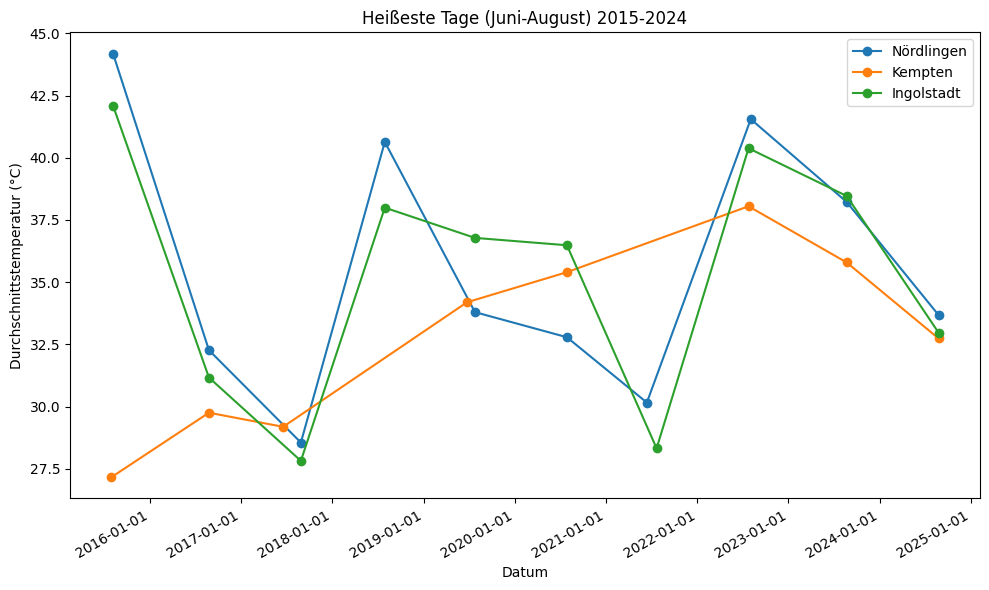

In [ ]:
import matplotlib.dates as mdates

# Diagramm erstellen
fig, ax = plt.subplots(figsize=(10, 6))

for city_name, hottest_days in all_hottest_days.items():
    dates = [datetime.strptime(day[0], '%Y-%m-%d') for day in hottest_days]  # Convert to datetime objects
    temps = [day[1] for day in hottest_days]
    ax.plot(dates, temps, label=city_name, marker='o')

ax.set_xlabel('Datum')
ax.set_ylabel('Durchschnittstemperatur (°C)')
ax.set_title('Heißeste Tage (Juni-August) 2015-2024')
ax.legend()

# Format the x-axis to display dates correctly
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Use DateFormatter
fig.autofmt_xdate()  # Auto-format the dates for better readability

plt.tight_layout()  # Anpassung des Layouts, um Überlappungen zu vermeiden
plt.show()

# Maximalwerte (heißeste Tage) für Frühling, Herbst und Winter

In [ ]:
import ee
import geemap
import geopandas as gpd
from shapely.geometry import mapping

# Funktion zur Maskierung von Wolken und Schatten
def maskClouds(image):
    # QA_PIXEL-Band auswählen
    qa_band = image.select('QA_PIXEL')

    # Bitmasken für Wolkenschatten (Bit 3) und Wolken (Bit 5) definieren
    cloud_shadow_bitmask = (1 << 3)  # 00001000 = 8
    cloud_bitmask = (1 << 5)         # 00100000 = 32

    # Prüfen, ob die relevanten Bits nicht gesetzt sind (d.h. wolkenfreie Pixel)
    mask = qa_band.bitwiseAnd(cloud_shadow_bitmask).eq(0).And(
           qa_band.bitwiseAnd(cloud_bitmask).eq(0))

    # Maske auf das Bild anwenden
    return image.updateMask(mask)


# Funktion zur Berechnung der LST
def calculateLST(image):
    kelvin = image.select('ST_B10').multiply(0.00341802).add(149.0)  # Radiance -> Kelvin
    lst_celsius = kelvin.subtract(273.15).rename('LST_Celsius')  # Kelvin -> Celsius
    return image.addBands(lst_celsius)

# FUNKTION ZUR ANALYSE DER LST FÜR EINE REGION PRO SZENE
def analyze_lst_per_scene(region_shapefile, start_date, end_date, region_name):
    # Region aus Shapefile laden und in ee.Geometry umwandeln
    gdf = gpd.read_file(region_shapefile)

    # CRS sicherstellen (WGS84)
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs("EPSG:4326")  # In WGS84 projizieren

    region = ee.Geometry(mapping(gdf.unary_union))

    # Landsat 8-Daten abrufen und verarbeiten
    landsat = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
        .filterDate(start_date, end_date) \
        .filterBounds(region) \
        .filter(ee.Filter.lt('CLOUD_COVER',50)) \
        .map(maskClouds) \
        .map(calculateLST)

    # Check if the collection is empty before proceeding
    if landsat.size().getInfo() == 0:
        print(f"No images found for {region_name} between {start_date} and {end_date}. Skipping...")
        return []  # Return an empty list if no images are found


    # Liste für die Ergebnisse
    results = []

    # Iteration über jede Szene in der Sammlung
    for scene in landsat.toList(landsat.size()).getInfo():
        # Get the image ID from the scene dictionary
        scene_id = scene['id']

        # Create ee.Image object using the ID
        scene_image = ee.Image(scene_id)

        # Apply calculateLST to add the 'LST_Celsius' band *before* clipping
        scene_image = calculateLST(scene_image)

        # Now clip to the region
        scene_image = scene_image.clip(region)

        # Datum aus der Szene extrahieren
        scene_date = ee.Date(scene_image.get('system:time_start')).format('YYYY-MM-dd').getInfo()

        # Mittlere LST für die Szene (nur innerhalb der Stadt) berechnen
        mean_lst = scene_image.select('LST_Celsius').reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=region,  # Geometrie der Stadt verwenden
            scale=30
        ).get('LST_Celsius').getInfo()

        # Ergebnisse zur Liste hinzufügen
        results.append([scene_date, mean_lst])

    # Den Tag mit der maximalen LST finden:
    max_lst_date = max(results, key=lambda x: x[1])[0]  # x[1] ist der LST-Wert
    max_lst_value = max(results, key=lambda x: x[1])[1]
    print(f"Der Tag mit der heißesten LST für {region_name} war {max_lst_date} mit einem Wert von {max_lst_value:.2f} °C.")

    return results

def find_hottest_day_average(results):
    """Findet den Tag mit der heißesten Durchschnittstemperatur in der Stadt."""

    # Return None if results is empty to avoid the ValueError
    if not results:
        return None, None

    daily_averages = {}
    for date, lst_value in results:
        if date in daily_averages:
            daily_averages[date].append(lst_value)
        else:
            daily_averages[date] = [lst_value]

    # Berechne die Durchschnittswerte für jeden Tag
    for date, lst_values in daily_averages.items():
        daily_averages[date] = sum(lst_values) / len(lst_values)

    # Finde den Tag mit der maximalen Durchschnittstemperatur
    hottest_day = max(daily_averages, key=daily_averages.get)
    hottest_day_lst = daily_averages[hottest_day]

    return hottest_day, hottest_day_lst


# Shapefile-Pfade
noerdlingen_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Nördlingen_Gerenze_shp.shp'
kempten_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Kempten (Allgäu) .shp'
ingolstadt_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Ingolstadt .shp'


# Zeiträume definieren
seasons = {
    "Frühling": ('2022-03-01', '2022-05-31'),
    "Herbst": ('2022-09-01', '2022-11-30'),
    "Winter": ('2022-12-01', '2023-02-28')  # Beachte: Winter geht über Jahreswechsel
}

# Restore the cities dictionary
cities = {
    'Nördlingen': '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Nördlingen_Gerenze_shp.shp',
    'Kempten': '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Kempten (Allgäu) .shp',
    'Ingolstadt': '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Ingolstadt .shp'
}

# Schleife über die Städte und Zeiträume
for city_name, shapefile_path in cities.items():
    for season_name, (start_date, end_date) in seasons.items():
        print(f"\nAnalyse für {city_name} im {season_name}:")
        results = analyze_lst_per_scene(shapefile_path, start_date, end_date, city_name)

        # Check if results is not empty before calling find_hottest_day_average
        if results:
            hottest_day, hottest_day_lst = find_hottest_day_average(results)  # Aufruf von find_hottest_day_average
            print(f"Der Tag mit der heißesten Durchschnittstemperatur für {city_name} im {season_name} war {hottest_day} mit einem Wert von {hottest_day_lst:.2f} °C.")
        else:
            print(f"No suitable images found for {city_name} in {season_name}. Skipping...") # Print a message if no images are found


Analyse für Nördlingen im Frühling:
Der Tag mit der heißesten LST für Nördlingen war 2022-05-22 mit einem Wert von 31.90 °C.
Der Tag mit der heißesten Durchschnittstemperatur für Nördlingen im Frühling war 2022-05-22 mit einem Wert von 31.90 °C.

Analyse für Nördlingen im Herbst:
Der Tag mit der heißesten LST für Nördlingen war 2022-09-04 mit einem Wert von 27.17 °C.
Der Tag mit der heißesten Durchschnittstemperatur für Nördlingen im Herbst war 2022-09-04 mit einem Wert von 27.17 °C.

Analyse für Nördlingen im Winter:
Der Tag mit der heißesten LST für Nördlingen war 2022-12-25 mit einem Wert von 6.21 °C.
Der Tag mit der heißesten Durchschnittstemperatur für Nördlingen im Winter war 2022-12-25 mit einem Wert von 6.21 °C.

Analyse für Kempten im Frühling:
Der Tag mit der heißesten LST für Kempten war 2022-05-15 mit einem Wert von 26.89 °C.
Der Tag mit der heißesten Durchschnittstemperatur für Kempten im Frühling war 2022-05-15 mit einem Wert von 26.89 °C.

Analyse für Kempten im Herbst:

# (Mittelwerte Frühling 2022 visualisieren)

=> nicht sinnvoll, weil sehr wolkig => zu wenig Daten

gleicher Code wie für Sommer, nur Datum und evtl Cloud Cover ändern, sowie Minimum bei 10 in Kartendarstellung

In [ ]:
# Funktion zur Maskierung von Wolken und Schatten
def maskClouds(image):
    # QA_PIXEL-Band auswählen
    qa_band = image.select('QA_PIXEL')

    # Bitmasken für Wolkenschatten (Bit 3) und Wolken (Bit 5) definieren
    cloud_shadow_bitmask = (1 << 3)  # 00001000 = 8
    cloud_bitmask = (1 << 5)         # 00100000 = 32

    # Prüfen, ob die relevanten Bits nicht gesetzt sind (d.h. wolkenfreie Pixel)
    mask = qa_band.bitwiseAnd(cloud_shadow_bitmask).eq(0).And(
           qa_band.bitwiseAnd(cloud_bitmask).eq(0))

    # Maske auf das Bild anwenden
    return image.updateMask(mask)

# Funktion zur Berechnung der LST
def calculateLST(image):
    kelvin = image.select('ST_B10').multiply(0.00341802).add(149.0)  # Radiance -> Kelvin
    lst_celsius = kelvin.subtract(273.15).rename('LST_Celsius')  # Kelvin -> Celsius
    return image.addBands(lst_celsius)

# hier wurde Ausreißerfilterung entfernt !!

# FUNKTION ZUR ANALYSE DER LST FÜR EINE REGION

def analyze_lst(region_shapefile, start_date, end_date, region_name):
    # Region aus Shapefile laden
    gdf = gpd.read_file(region_shapefile)
    region = ee.Geometry(mapping(gdf.unary_union))

     # CRS sicherstellen (WGS84)
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs("EPSG:4326")  # In WGS84 projizieren

    region = ee.Geometry(mapping(gdf.unary_union))

    # Landsat 8-Daten abrufen und verarbeiten
    landsat = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
        .filterDate(start_date, end_date) \
        .filterBounds(region) \
          .filter(ee.Filter.lt('CLOUD_COVER', 5)) \
        .map(maskClouds) \
        .map(calculateLST)
  # hier wird Cloud Cover Filterung entfernt oder angewendet

  # IDs der verwendeten Szenen abrufen und ausgeben
    scene_ids = landsat.aggregate_array('system:index').getInfo()
    print(f"Verwendete Szenen-IDs für {region_name}: {scene_ids}")


    # Mittlere LST berechnen und auf die Region zuschneiden
    mean_lst = landsat.select('LST_Celsius').mean().clip(region)

    # Visualisierung
    lst_palette = ['blue', 'cyan', 'green', 'yellow', 'orange', 'red']
    Map = geemap.Map()
    Map.centerObject(region, 12)
    Map.addLayer(mean_lst, {'min': 20, 'max': 40, 'palette': lst_palette}, f'Mean LST {region_name}')
    Map.addLayer(region, {}, f'{region_name} Boundary')
    Map.add_colorbar(
        vis_params={'min': 20, 'max': 40, 'palette': lst_palette},
        label="Land Surface Temperature Spring 2022 (°C)"
    )
    Map

    return mean_lst # Füge diese Zeile hinzu, um mean_lst zurückzugeben


# Shapefile-Pfade
noerdlingen_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Nördlingen_Gerenze_shp.shp'
kempten_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Kempten (Allgäu) .shp'
ingolstadt_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Ingolstadt .shp'

# Zeitraum
start_date = '2022-03-01'
end_date = '2022-05-31'

# Analyse für jede Region durchführen und Ergebnisse speichern
results = {
    'Nördlingen': analyze_lst(noerdlingen_shapefile, start_date, end_date, 'Nördlingen'),
    'Kempten': analyze_lst(kempten_shapefile, start_date, end_date, 'Kempten'),
    'Ingolstadt': analyze_lst(ingolstadt_shapefile, start_date, end_date, 'Ingolstadt')
}

# Karte erstellen und Ergebnisse hinzufügen
Map = geemap.Map()

lst_palette = ['blue', 'cyan', 'green', 'yellow', 'orange', 'red']

for region_name, mean_lst_image in results.items():
    Map.addLayer(mean_lst_image, {'min': 20, 'max': 40, 'palette': lst_palette}, f'Mean LST {region_name}')

    # Load the shapefile for the region to display boundaries
    gdf = gpd.read_file(noerdlingen_shapefile if region_name == 'Nördlingen' else
                        kempten_shapefile if region_name == 'Kempten' else
                        ingolstadt_shapefile) # Assumes ingolstadt_shapefile for 'Ingolstadt'
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs("EPSG:4326")
    region_boundary = ee.Geometry(mapping(gdf.unary_union))
    Map.addLayer(region_boundary, {}, f'{region_name} Boundary')

Map.add_colorbar(vis_params={'min': 0, 'max': 30, 'palette': lst_palette}, label="Land Surface Temperature Summer 2022 (°C)")
Map # Display the map


# Dieses Ergebnis hat auf <5% Wolkenbedeckung gefiltert und zudem die Wolkenpixel maskiert. Ausreißer wurden NICHT gefiltert.

Verwendete Szenen-IDs für Nördlingen: ['LC08_193026_20220312', 'LC08_193026_20220328', 'LC08_193026_20220515', 'LC08_194026_20220303', 'LC08_194026_20220420']
Verwendete Szenen-IDs für Kempten: ['LC08_193027_20220328', 'LC08_194027_20220303', 'LC08_194027_20220420']
Verwendete Szenen-IDs für Ingolstadt: ['LC08_193026_20220312', 'LC08_193026_20220328', 'LC08_193026_20220515', 'LC08_194026_20220303', 'LC08_194026_20220420']


Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [ ]:
# Ergebnisse als png in Drive speichern

# Funktion zum Exportieren als PNG
def export_as_GeoTIFF(image, region, filename):
    # Replace invalid characters in the filename for the description
    description = filename.replace("ö", "oe").replace("ä", "ae").replace("ü", "ue")
    task = ee.batch.Export.image.toDrive(
        image=image,
        description=description,  # Use the modified filename as the description
        folder='/content/drive/MyDrive/Daten BA /erstellte Dateien mit colab/LST Exporte',  # Optional: Ordner in Google Drive
        scale=30,
        region=region.bounds(),
        fileFormat='GeoTIFF'
    )
    task.start()
    print(f'Export gestartet: {filename}')

# Exportiere die Ergebnisse für jede Stadt
for city_name, mean_lst_image in results.items():  # Only unpack city_name and mean_lst_image
    # Lade das Shapefile für die jeweilige Region
    shapefile_path = noerdlingen_shapefile if city_name == 'Nördlingen' else \
                     kempten_shapefile if city_name == 'Kempten' else \
                     ingolstadt_shapefile
    gdf = gpd.read_file(shapefile_path)

    # CRS sicherstellen (WGS84)
    if gdf.crs != "EPSG:3857":
        gdf = gdf.to_crs("EPSG:3857")  # In WGS84 projizieren

    region = ee.Geometry(mapping(gdf.unary_union))

    filename = f'meanLST_{city_name}_Spring_2022'  # Dateiname
    #export_as_GeoTIFF(mean_lst_image, region, filename)  # Exportieren

In [ ]:
# Extrahiere die mittleren LST-Werte aus den Ergebnissen
city_data = []
for city_name, mean_lst_image in results.items():
    # Lade das Shapefile für die jeweilige Region
    shapefile_path = noerdlingen_shapefile if city_name == 'Nördlingen' else \
                     kempten_shapefile if city_name == 'Kempten' else \
                     ingolstadt_shapefile
    gdf = gpd.read_file(shapefile_path)

    # Reproject the shapefile to the same projection as the image
    image_projection = mean_lst_image.projection()
    gdf = gdf.to_crs(image_projection.crs().getInfo())

    region = ee.Geometry(mapping(gdf.unary_union))

    # Berechne den mittleren LST-Wert für die Region
    mean_lst_value = mean_lst_image.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=region,  # Verwende die Geometrie aus dem Shapefile
        scale=30,
        maxPixels=1e13,
        crs=image_projection # Add crs parameter
    ).get('LST_Celsius').getInfo()

    city_data.append([city_name, mean_lst_value])

# Erstelle eine Pandas DataFrame
df = pd.DataFrame(city_data, columns=['City', 'Mean LST'])
print(df)

         City   Mean LST
0  Nördlingen  21.932730
1     Kempten  17.058697
2  Ingolstadt  21.620964


In [ ]:
for city_name, mean_lst_image in results.items():
    # Lade das Shapefile für die jeweilige Region
    shapefile_path = noerdlingen_shapefile if city_name == 'Nördlingen' else \
                     kempten_shapefile if city_name == 'Kempten' else \
                     ingolstadt_shapefile
    gdf = gpd.read_file(shapefile_path)

    # Reproject the shapefile to the same projection as the image
    # Get the image's projection and transform it to an EPSG code
    image_projection = mean_lst_image.projection().crs().getInfo()
    try:
        image_epsg = image_projection.split(':')[1]
        gdf = gdf.to_crs(epsg=int(image_epsg))
    except IndexError:
        print("Could not determine EPSG code from image projection.")
        continue  # Skip this city if projection is problematic

    region = ee.Geometry(mapping(gdf.unary_union))


# Function to add coordinates to features
def add_coords(feature):
    return feature.set('latitude', feature.geometry().coordinates().get(1)).set('longitude', feature.geometry().coordinates().get(0))

# Loop through the cities and export data with coordinates
for city_name, mean_lst_image in results.items():
    # Load the shapefile for the current city
    shapefile_path = noerdlingen_shapefile if city_name == 'Nördlingen' else \
                     kempten_shapefile if city_name == 'Kempten' else \
                     ingolstadt_shapefile
    gdf = gpd.read_file(shapefile_path)

    # Reproject if necessary
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs("EPSG:4326")

    region = ee.Geometry(mapping(gdf.unary_union))

    # Get image projection
    image_projection = mean_lst_image.projection().crs().getInfo()

    # Sample the image and add coordinates
    samples = mean_lst_image.sample(
        region=region,
        scale=30,
        projection=image_projection,
        geometries=True
    )
    samples_with_coords = samples.map(add_coords)

    # Export to CSV with coordinates
    #geemap.ee_export_vector(samples_with_coords, filename=f'/content/drive/MyDrive/Daten BA /erstellte Dateien mit colab/LST_{city_name}_Spring_2022_with_coords.csv')
    print(f"LST-Daten für {city_name} mit Koordinaten als CSV re-exportiert.")

LST-Daten für Nördlingen mit Koordinaten als CSV re-exportiert.
LST-Daten für Kempten mit Koordinaten als CSV re-exportiert.
LST-Daten für Ingolstadt mit Koordinaten als CSV re-exportiert.


In [ ]:
import ee
import geemap
import geopandas as gpd
from shapely.geometry import mapping

# Load the shapefile for Nördlingen
noerdlingen_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Nördlingen_Gerenze_shp.shp'
gdf = gpd.read_file(noerdlingen_shapefile)

# Reproject the shapefile to WGS84 if necessary
if gdf.crs != "EPSG:4326":
    gdf = gdf.to_crs("EPSG:4326")

# Create an ee.Geometry object from the shapefile
region = ee.Geometry(mapping(gdf.unary_union))

# Get the mean_lst_image for Nördlingen from your 'results' dictionary
mean_lst_image = results['Nördlingen']

# Get the image's projection and transform it to an EPSG code
image_projection = mean_lst_image.projection().crs().getInfo()

# Define scale and maxPixels (if needed)
scale = 30
maxPixels = 1e13  # Adjust as needed

# Sample the image and add coordinates
samples = mean_lst_image.sample(
    region=region,
    scale=scale,
    projection=image_projection,
    geometries=True
)

def add_coords(feature):
    return feature.set('latitude', feature.geometry().coordinates().get(1)).set('longitude', feature.geometry().coordinates().get(0))

samples_with_coords = samples.map(add_coords)

# Re-export the data to a new CSV file with coordinates

#geemap.ee_export_vector(samples_with_coords, filename=f'/content/drive/MyDrive/Daten BA /erstellte Dateien mit colab/LST_Noerdlingen_Spring_2022_with_coords_.csv')
#print(f"LST-Daten für Nördlingen mit Koordinaten als CSV re-exportiert.")

# mittlere LST für Herbst 2015-2024

In [ ]:
# Funktion zur Maskierung von Wolken und Schatten
def maskClouds(image):
    # QA_PIXEL-Band auswählen
    qa_band = image.select('QA_PIXEL')

    # Bitmasken für Wolkenschatten (Bit 3) und Wolken (Bit 5) definieren
    cloud_shadow_bitmask = (1 << 3)  # 00001000 = 8
    cloud_bitmask = (1 << 5)         # 00100000 = 32

    # Prüfen, ob die relevanten Bits nicht gesetzt sind (d.h. wolkenfreie Pixel)
    mask = qa_band.bitwiseAnd(cloud_shadow_bitmask).eq(0).And(
           qa_band.bitwiseAnd(cloud_bitmask).eq(0))

    # Maske auf das Bild anwenden
    return image.updateMask(mask)

# Funktion zur Berechnung der LST
def calculateLST(image):
    kelvin = image.select('ST_B10').multiply(0.00341802).add(149.0)  # Radiance -> Kelvin
    lst_celsius = kelvin.subtract(273.15).rename('LST_Celsius')  # Kelvin -> Celsius
    return image.addBands(lst_celsius)

# hier wurde Ausreißerfilterung entfernt !!

# FUNKTION ZUR ANALYSE DER LST FÜR EINE REGION

def analyze_lst(region_shapefile, start_date, end_date, region_name):
    # Region aus Shapefile laden
    gdf = gpd.read_file(region_shapefile)
    region = ee.Geometry(mapping(gdf.unary_union))

     # CRS sicherstellen (WGS84)
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs("EPSG:4326")  # In WGS84 projizieren

    region = ee.Geometry(mapping(gdf.unary_union))

    # Landsat 8-Daten abrufen und verarbeiten
    landsat = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
        .filterDate(start_date, end_date) \
        .filterBounds(region) \
          .filter(ee.Filter.lt('CLOUD_COVER', 40)) \
        .map(maskClouds) \
        .map(calculateLST)
  # hier wird Cloud Cover Filterung entfernt oder angewendet

    # Mittlere LST berechnen und auf die Region zuschneiden
    mean_lst = landsat.select('LST_Celsius').mean().clip(region)

    return mean_lst # mean_lst zurückgeben

    # Visualisierung
    lst_palette = ['blue', 'cyan', 'green', 'yellow', 'orange', 'red']
    Map = geemap.Map()
    Map.centerObject(region, 12)
    Map.addLayer(mean_lst, {'min': 10, 'max': 35, 'palette': lst_palette}, f'Mean LST {region_name}')
    Map.addLayer(region, {}, f'{region_name} Boundary')
    Map.add_colorbar(
        vis_params={'min': 10, 'max': 35, 'palette': lst_palette},
        label="Land Surface Temperature Aututmn 2015-2024 (°C)"
    )
    Map

    return mean_lst # Füge diese Zeile hinzu, um mean_lst zurückzugeben


# Shapefile-Pfade
noerdlingen_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Nördlingen_Gerenze_shp.shp'
kempten_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Kempten (Allgäu) .shp'
ingolstadt_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Ingolstadt .shp'

# Städte und Shapefiles
cities = {
    'Nördlingen': noerdlingen_shapefile,
    'Kempten': kempten_shapefile,
    'Ingolstadt': ingolstadt_shapefile
}


# Zeitraum
start_year = 2015
end_year = 2024

def calculate_mean_autumn_lst(region_shapefile, year, region_name):
    # Zeitraum auf Herbst des aktuellen Jahres beschränken
    start_date = f'{year}-09-01'
    end_date = f'{year}-11-30'

    # Define landsat collection inside the function or declare as global
    landsat_collection = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
        .filterDate(start_date, end_date) \
        .filterBounds(region) \
        .filter(ee.Filter.lt('CLOUD_COVER', 40)) \
        .map(maskClouds) \
        .map(calculateLST)

    landsat = landsat_collection.filterDate(start_date, end_date)

    # Print scene IDs here (inside the function)
    scene_ids = landsat.aggregate_array('system:index').getInfo()
    print(f"Verwendete Szenen-IDs für {region_name} in {year}: {scene_ids}")


# Analyse für jede Stadt durchführen und Ergebnisse speichern
all_autumn_lst = {}
for city_name, shapefile_path in cities.items():
    autumn_lst_data = []
    for year in range(start_year, end_year + 1):
        mean_lst = calculate_mean_autumn_lst(shapefile_path, year, city_name)
        autumn_lst_data.append([datetime(year, 9, 1), mean_lst]) # Hier ein datetime-Objekt erstellen
    all_autumn_lst[city_name] = autumn_lst_data

# Karte erstellen und Ergebnisse hinzufügen
Map = geemap.Map()

lst_palette = ['blue', 'cyan', 'green', 'yellow', 'orange', 'red']

for region_name, mean_lst_image in results.items():
    Map.addLayer(mean_lst_image, {'min': 10, 'max': 35, 'palette': lst_palette}, f'Mean LST {region_name}')

    # Load the shapefile for the region to display boundaries
    gdf = gpd.read_file(noerdlingen_shapefile if region_name == 'Nördlingen' else
                        kempten_shapefile if region_name == 'Kempten' else
                        ingolstadt_shapefile) # Assumes ingolstadt_shapefile for 'Ingolstadt'
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs("EPSG:4326")
    region_boundary = ee.Geometry(mapping(gdf.unary_union))
    Map.addLayer(region_boundary, {}, f'{region_name} Boundary')

Map.add_colorbar(vis_params={'min': 10, 'max': 35, 'palette': lst_palette}, label="Land Surface Temperature Summer 2022 (°C)")
Map # Display the map



Verwendete Szenen-IDs für Nördlingen in 2015: ['LC08_193026_20150901', 'LC08_193026_20150917', 'LC08_193026_20151003', 'LC08_194026_20151111']
Verwendete Szenen-IDs für Nördlingen in 2016: ['LC08_194026_20160910', 'LC08_194026_20161129']
Verwendete Szenen-IDs für Nördlingen in 2017: ['LC08_194026_20171015']
Verwendete Szenen-IDs für Nördlingen in 2018: ['LC08_193026_20180925', 'LC08_193026_20181011', 'LC08_194026_20180916', 'LC08_194026_20181018']
Verwendete Szenen-IDs für Nördlingen in 2019: ['LC08_193026_20191014', 'LC08_194026_20190903', 'LC08_194026_20190919']
Verwendete Szenen-IDs für Nördlingen in 2020: ['LC08_193026_20200914', 'LC08_194026_20200921']
Verwendete Szenen-IDs für Nördlingen in 2021: ['LC08_193026_20210901', 'LC08_194026_20210908', 'LC08_194026_20210924', 'LC08_194026_20211010', 'LC08_194026_20211111']
Verwendete Szenen-IDs für Nördlingen in 2022: ['LC08_193026_20220904', 'LC08_194026_20221029']
Verwendete Szenen-IDs für Nördlingen in 2023: ['LC08_193026_20230907', '

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [ ]:
# Daten der verwendeten Szenen

# Assuming you have the following variables already defined and calculated:
# - cities: a dictionary mapping city names to shapefile paths
# - start_date, end_date: strings representing the date range
# - cloud_cover: integer representing the cloud cover threshold
# - results: a dictionary storing the mean LST results from a previous analysis

# Loop through cities and extract information
for city_name, mean_lst_image in results.items():
    # Load the shapefile for the current city
    shapefile_path = cities[city_name]
    region = load_region(shapefile_path)  # Assuming you have the load_region function defined

    # Get the original Landsat collection for the city
    landsat = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
        .filterDate(start_date, end_date) \
        .filterBounds(region) \
        .filter(ee.Filter.lt('CLOUD_COVER', cloud_cover))

    # Aufnahmedaten der Szenen abrufen
    scene_dates = landsat.map(lambda image: image.set('date', image.date().format('YYYY-MM-dd'))).distinct('date').aggregate_array('date').getInfo()
    print(f"Stadt: {city_name} (Cloud Cover < {cloud_cover}%)")  # Added cloud cover to city name output
    print(f"Aufnahmedaten der Szenen: {scene_dates}")

    # Calculate min and max pixel values using the mean LST image
    min_max = mean_lst_image.reduceRegion(
        reducer=ee.Reducer.minMax(),
        geometry=region,
        scale=30  # Adjust scale as needed
    ).getInfo()

    print(f"Kleinster Pixelwert: {min_max['LST_Celsius_min']:.2f} (Cloud Cover < {cloud_cover}%)")  # Added cloud cover to min/max output
    print(f"Größter Pixelwert: {min_max['LST_Celsius_max']:.2f} (Cloud Cover < {cloud_cover}%)")  # Added cloud cover to min/max output
    print("-" * 30)

Stadt: Nördlingen (Cloud Cover < 40%)
Aufnahmedaten der Szenen: ['2022-03-12', '2022-03-28', '2022-05-15', '2022-03-03', '2022-03-19', '2022-04-04', '2022-04-20', '2022-05-22']
Kleinster Pixelwert: 13.76 (Cloud Cover < 40%)
Größter Pixelwert: 30.18 (Cloud Cover < 40%)
------------------------------
Stadt: Kempten (Cloud Cover < 40%)
Aufnahmedaten der Szenen: ['2022-03-12', '2022-03-28', '2022-04-13', '2022-04-29', '2022-05-15', '2022-03-03', '2022-03-19', '2022-04-04', '2022-04-20']
Kleinster Pixelwert: 6.14 (Cloud Cover < 40%)
Größter Pixelwert: 24.20 (Cloud Cover < 40%)
------------------------------
Stadt: Ingolstadt (Cloud Cover < 40%)
Aufnahmedaten der Szenen: ['2022-03-12', '2022-03-28', '2022-05-15', '2022-03-03', '2022-03-19', '2022-04-04', '2022-04-20', '2022-05-22']
Kleinster Pixelwert: 7.18 (Cloud Cover < 40%)
Größter Pixelwert: 39.61 (Cloud Cover < 40%)
------------------------------


# auf Ausreißer prüfen, und evtl entfernen

# mittlere LST für Winter 2015/2024

In [ ]:
# Funktion zur Maskierung von Wolken und Schatten
def maskClouds(image):
    # QA_PIXEL-Band auswählen
    qa_band = image.select('QA_PIXEL')

    # Bitmasken für Wolkenschatten (Bit 3) und Wolken (Bit 5) definieren
    cloud_shadow_bitmask = (1 << 3)  # 00001000 = 8
    cloud_bitmask = (1 << 5)         # 00100000 = 32

    # Prüfen, ob die relevanten Bits nicht gesetzt sind (d.h. wolkenfreie Pixel)
    mask = qa_band.bitwiseAnd(cloud_shadow_bitmask).eq(0).And(
           qa_band.bitwiseAnd(cloud_bitmask).eq(0))

    # Maske auf das Bild anwenden
    return image.updateMask(mask)

# Funktion zur Berechnung der LST
def calculateLST(image):
    kelvin = image.select('ST_B10').multiply(0.00341802).add(149.0)  # Radiance -> Kelvin
    lst_celsius = kelvin.subtract(273.15).rename('LST_Celsius')  # Kelvin -> Celsius
    return image.addBands(lst_celsius)

# hier wurde Ausreißerfilterung entfernt !!

# FUNKTION ZUR ANALYSE DER LST FÜR EINE REGION

def analyze_lst(region_shapefile, start_date, end_date, region_name):
    # Region aus Shapefile laden
    gdf = gpd.read_file(region_shapefile)
    region = ee.Geometry(mapping(gdf.unary_union))

     # CRS sicherstellen (WGS84)
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs("EPSG:4326")  # In WGS84 projizieren

    region = ee.Geometry(mapping(gdf.unary_union))

    # Landsat 8-Daten abrufen und verarbeiten
    landsat = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
        .filterDate(start_date, end_date) \
        .filterBounds(region) \
        .filter(ee.Filter.lt('CLOUD_COVER', 30)) \
        .map(maskClouds) \
        .map(calculateLST)
    # hier wird Cloud Cover Filterung entfernt oder angewendet

    # Mittlere LST berechnen und auf die Region zuschneiden
    mean_lst = landsat.select('LST_Celsius').mean().clip(region)

    return mean_lst # mean_lst zurückgeben

    # Visualisierung
    lst_palette = ['blue', 'cyan', 'green', 'yellow', 'orange', 'red']
    Map = geemap.Map()
    Map.centerObject(region, 12)
    Map.addLayer(mean_lst, {'min': -10, 'max': 25, 'palette': lst_palette}, f'Mean LST {region_name}')
    Map.addLayer(region, {}, f'{region_name} Boundary')
    Map.add_colorbar(
        vis_params={'min': -10, 'max': 25, 'palette': lst_palette},
        label="Land Surface Temperature Winter 2022 (°C)"  # Updated label for winter
    )
    Map

    return mean_lst # Füge diese Zeile hinzu, um mean_lst zurückzugeben


# Shapefile-Pfade
noerdlingen_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Nördlingen_Gerenze_shp.shp'
kempten_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Kempten (Allgäu) .shp'
ingolstadt_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Ingolstadt .shp'

# Städte und Shapefiles
cities = {
    'Nördlingen': noerdlingen_shapefile,
    'Kempten': kempten_shapefile,
    'Ingolstadt': ingolstadt_shapefile
}

# Zeitraum
start_year = 2014  # Start year including December for the first winter
end_year = 2024

def calculate_mean_winter_lst(region_shapefile, year, region_name):
    # Zeitraum auf Winter des aktuellen Jahres beschränken
    start_date = f'{year}-12-01'
    end_date = f'{year + 1}-02-28'  # End date in the next year's February

    # Region aus Shapefile laden und in ee.Geometry umwandeln
    gdf = gpd.read_file(region_shapefile)

    # CRS sicherstellen (WGS84)
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs("EPSG:4326")  # In WGS84 projizieren

    region = ee.Geometry(mapping(gdf.unary_union))

    # Define landsat collection inside the function or declare as global
    landsat_collection = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
        .filterDate(start_date, end_date) \
        .filterBounds(region) \
        .filter(ee.Filter.lt('CLOUD_COVER', 30)) \
        .map(maskClouds) \
        .map(calculateLST)


    landsat = landsat_collection.filterDate(start_date, end_date)

    # Print scene IDs here (inside the function)
    scene_ids = landsat.aggregate_array('system:index').getInfo()
    print(f"Verwendete Szenen-IDs für {region_name} in {year}/{year + 1}: {scene_ids}")  # Updated year format

    # Mittlere LST berechnen und auf die Region zuschneiden
    mean_lst = landsat.select('LST_Celsius').mean().clip(region)  # Calculate mean LST here

    return mean_lst # mean_lst zurückgeben


# Analyse für jede Stadt durchführen und Ergebnisse speichern
all_winter_lst = {}  # Changed variable name to all_winter_lst
for city_name, shapefile_path in cities.items():
    winter_lst_data = []
    for year in range(start_year, end_year):  # Adjusted loop to end at end_year - 1
        mean_lst = calculate_mean_winter_lst(shapefile_path, year, city_name)
        winter_lst_data.append([datetime(year, 12, 1), mean_lst])  # datetime object for December
    all_winter_lst[city_name] = winter_lst_data


# Karte erstellen und Ergebnisse hinzufügen
Map = geemap.Map()

lst_palette = ['blue', 'cyan', 'green', 'yellow', 'orange', 'red']

for region_name, mean_lst_image in results.items():
    Map.addLayer(mean_lst_image, {'min': -10, 'max': 25, 'palette': lst_palette}, f'Mean LST {region_name}')

    # Load the shapefile for the region to display boundaries
    gdf = gpd.read_file(noerdlingen_shapefile if region_name == 'Nördlingen' else
                        kempten_shapefile if region_name == 'Kempten' else
                        ingolstadt_shapefile) # Assumes ingolstadt_shapefile for 'Ingolstadt'
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs("EPSG:4326")
    region_boundary = ee.Geometry(mapping(gdf.unary_union))
    Map.addLayer(region_boundary, {}, f'{region_name} Boundary')

Map.add_colorbar(vis_params={'min': -10, 'max': 25, 'palette': lst_palette}, label="Land Surface Temperature Summer 2022 (°C)")
Map # Display the map

Verwendete Szenen-IDs für Nördlingen in 2014/2015: []
Verwendete Szenen-IDs für Nördlingen in 2015/2016: ['LC08_193026_20151206', 'LC08_194026_20160114']
Verwendete Szenen-IDs für Nördlingen in 2016/2017: []
Verwendete Szenen-IDs für Nördlingen in 2017/2018: ['LC08_193026_20180213']
Verwendete Szenen-IDs für Nördlingen in 2018/2019: ['LC08_193026_20190216', 'LC08_194026_20190223']
Verwendete Szenen-IDs für Nördlingen in 2019/2020: []
Verwendete Szenen-IDs für Nördlingen in 2020/2021: ['LC08_194026_20210212']
Verwendete Szenen-IDs für Nördlingen in 2021/2022: ['LC08_193026_20211222', 'LC08_194026_20220114']
Verwendete Szenen-IDs für Nördlingen in 2022/2023: []
Verwendete Szenen-IDs für Nördlingen in 2023/2024: ['LC08_193026_20240129', 'LC08_194026_20231203', 'LC08_194026_20240120']
Verwendete Szenen-IDs für Kempten in 2014/2015: ['LC08_193027_20141219', 'LC08_194027_20150212']
Verwendete Szenen-IDs für Kempten in 2015/2016: ['LC08_193027_20151206', 'LC08_193027_20151222', 'LC08_193027_2

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

??? v.a. Ingolstadt zu warm dargestellt, nicht logisch

# mittlere LST für Frühling 2015-2024

In [ ]:
# Funktion zur Maskierung von Wolken und Schatten
def maskClouds(image):
    # QA_PIXEL-Band auswählen
    qa_band = image.select('QA_PIXEL')

    # Bitmasken für Wolkenschatten (Bit 3) und Wolken (Bit 5) definieren
    cloud_shadow_bitmask = (1 << 3)  # 00001000 = 8
    cloud_bitmask = (1 << 5)         # 00100000 = 32

    # Prüfen, ob die relevanten Bits nicht gesetzt sind (d.h. wolkenfreie Pixel)
    mask = qa_band.bitwiseAnd(cloud_shadow_bitmask).eq(0).And(
           qa_band.bitwiseAnd(cloud_bitmask).eq(0))

    # Maske auf das Bild anwenden
    return image.updateMask(mask)

# Funktion zur Berechnung der LST
def calculateLST(image):
    kelvin = image.select('ST_B10').multiply(0.00341802).add(149.0)  # Radiance -> Kelvin
    lst_celsius = kelvin.subtract(273.15).rename('LST_Celsius')  # Kelvin -> Celsius
    return image.addBands(lst_celsius)

# hier wurde Ausreißerfilterung entfernt !!

# FUNKTION ZUR ANALYSE DER LST FÜR EINE REGION

def analyze_lst(region_shapefile, start_date, end_date, region_name):
    # Region aus Shapefile laden
    gdf = gpd.read_file(region_shapefile)
    region = ee.Geometry(mapping(gdf.unary_union))

     # CRS sicherstellen (WGS84)
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs("EPSG:4326")  # In WGS84 projizieren

    region = ee.Geometry(mapping(gdf.unary_union))

    # Landsat 8-Daten abrufen und verarbeiten
    landsat = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
        .filterDate(start_date, end_date) \
        .filterBounds(region) \
        .filter(ee.Filter.lt('CLOUD_COVER', 10)) \
        .map(maskClouds) \
        .map(calculateLST)
    # hier wird Cloud Cover Filterung entfernt oder angewendet

    # Mittlere LST berechnen und auf die Region zuschneiden
    mean_lst = landsat.select('LST_Celsius').mean().clip(region)

    return mean_lst # mean_lst zurückgeben

    # Visualisierung
    lst_palette = ['blue', 'cyan', 'green', 'yellow', 'orange', 'red']
    Map = geemap.Map()
    Map.centerObject(region, 12)
    Map.addLayer(mean_lst, {'min': 0, 'max': 30, 'palette': lst_palette}, f'Mean LST {region_name}')
    Map.addLayer(region, {}, f'{region_name} Boundary')
    Map.add_colorbar(
        vis_params={'min': 0, 'max': 30, 'palette': lst_palette},
        label="Land Surface Temperature Spring 2015-2024 (°C)"  # Updated label for winter
    )
    Map

    return mean_lst # Füge diese Zeile hinzu, um mean_lst zurückzugeben


# Shapefile-Pfade
noerdlingen_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Nördlingen_Gerenze_shp.shp'
kempten_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Kempten (Allgäu) .shp'
ingolstadt_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Ingolstadt .shp'

# Städte und Shapefiles
cities = {
    'Nördlingen': noerdlingen_shapefile,
    'Kempten': kempten_shapefile,
    'Ingolstadt': ingolstadt_shapefile
}

# Zeitraum
start_year = 2015
end_year = 2024

def calculate_mean_spring_lst(region_shapefile, year, region_name):
    # Zeitraum auf Frühling des aktuellen Jahres beschränken
    start_date = f'{year}-03-01'
    end_date = f'{year}-05-31'

    # Region aus Shapefile laden und in ee.Geometry umwandeln
    gdf = gpd.read_file(region_shapefile)

    # CRS sicherstellen (WGS84)
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs("EPSG:4326")  # In WGS84 projizieren

    region = ee.Geometry(mapping(gdf.unary_union))

    # Define landsat collection inside the function or declare as global
    landsat_collection = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
        .filterDate(start_date, end_date) \
        .filterBounds(region) \
        .filter(ee.Filter.lt('CLOUD_COVER', 10)) \
        .map(maskClouds) \
        .map(calculateLST)

    landsat = landsat_collection.filterDate(start_date, end_date)

    # Print scene IDs here (inside the function)
    scene_ids = landsat.aggregate_array('system:index').getInfo()
    print(f"Verwendete Szenen-IDs für {region_name} in {year} (Frühling): {scene_ids}")

    # Mittlere LST berechnen und auf die Region zuschneiden
    mean_lst = landsat.select('LST_Celsius').mean().clip(region)  # Calculate mean LST here

    return mean_lst # mean_lst zurückgeben


# Analyse für jede Stadt durchführen und Ergebnisse speichern
all_spring_lst = {}  # Changed variable name to all_spring_lst
for city_name, shapefile_path in cities.items():
    spring_lst_data = []
    for year in range(start_year, end_year + 1):
        mean_lst = calculate_mean_spring_lst(shapefile_path, year, city_name)
        spring_lst_data.append([datetime(year, 3, 1), mean_lst])  # datetime object for March (start of spring)
    all_spring_lst[city_name] = spring_lst_data

# Karte erstellen und Ergebnisse hinzufügen
Map = geemap.Map()

lst_palette = ['blue', 'cyan', 'green', 'yellow', 'orange', 'red']

for region_name, mean_lst_image in results.items():
    Map.addLayer(mean_lst_image, {'min': 0, 'max': 30, 'palette': lst_palette}, f'Mean LST {region_name}')

    # Load the shapefile for the region to display boundaries
    gdf = gpd.read_file(noerdlingen_shapefile if region_name == 'Nördlingen' else
                        kempten_shapefile if region_name == 'Kempten' else
                        ingolstadt_shapefile) # Assumes ingolstadt_shapefile for 'Ingolstadt'
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs("EPSG:4326")
    region_boundary = ee.Geometry(mapping(gdf.unary_union))
    Map.addLayer(region_boundary, {}, f'{region_name} Boundary')

Map.add_colorbar(vis_params={'min': 0, 'max': 30, 'palette': lst_palette}, label="Land Surface Temperature Summer 2022 (°C)")
Map # Display the map

Verwendete Szenen-IDs für Nördlingen in 2015 (Frühling): ['LC08_193026_20150309', 'LC08_193026_20150410']
Verwendete Szenen-IDs für Nördlingen in 2016 (Frühling): ['LC08_194026_20160318']
Verwendete Szenen-IDs für Nördlingen in 2017 (Frühling): ['LC08_193026_20170517']
Verwendete Szenen-IDs für Nördlingen in 2018 (Frühling): ['LC08_193026_20180418']
Verwendete Szenen-IDs für Nördlingen in 2019 (Frühling): ['LC08_193026_20190421']
Verwendete Szenen-IDs für Nördlingen in 2020 (Frühling): ['LC08_193026_20200322', 'LC08_193026_20200407', 'LC08_193026_20200423']
Verwendete Szenen-IDs für Nördlingen in 2021 (Frühling): ['LC08_193026_20210426']
Verwendete Szenen-IDs für Nördlingen in 2022 (Frühling): ['LC08_193026_20220312', 'LC08_193026_20220328', 'LC08_193026_20220515', 'LC08_194026_20220303', 'LC08_194026_20220319', 'LC08_194026_20220420']
Verwendete Szenen-IDs für Nördlingen in 2023 (Frühling): []
Verwendete Szenen-IDs für Nördlingen in 2024 (Frühling): []
Verwendete Szenen-IDs für Kempte

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

# mittlere LST für Sommer 2015-2024

In [ ]:
# Funktion zur Maskierung von Wolken und Schatten
def maskClouds(image):
    # QA_PIXEL-Band auswählen
    qa_band = image.select('QA_PIXEL')

    # Bitmasken für Wolkenschatten (Bit 3) und Wolken (Bit 5) definieren
    cloud_shadow_bitmask = (1 << 3)  # 00001000 = 8
    cloud_bitmask = (1 << 5)         # 00100000 = 32

    # Prüfen, ob die relevanten Bits nicht gesetzt sind (d.h. wolkenfreie Pixel)
    mask = qa_band.bitwiseAnd(cloud_shadow_bitmask).eq(0).And(
           qa_band.bitwiseAnd(cloud_bitmask).eq(0))

    # Maske auf das Bild anwenden
    return image.updateMask(mask)

# Funktion zur Berechnung der LST
def calculateLST(image):
    kelvin = image.select('ST_B10').multiply(0.00341802).add(149.0)  # Radiance -> Kelvin
    lst_celsius = kelvin.subtract(273.15).rename('LST_Celsius')  # Kelvin -> Celsius
    return image.addBands(lst_celsius)

# hier wurde Ausreißerfilterung entfernt !!

# FUNKTION ZUR ANALYSE DER LST FÜR EINE REGION

def analyze_lst(region_shapefile, start_date, end_date, region_name):
    # Region aus Shapefile laden
    gdf = gpd.read_file(region_shapefile)
    region = ee.Geometry(mapping(gdf.unary_union))

     # CRS sicherstellen (WGS84)
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs("EPSG:4326")  # In WGS84 projizieren

    region = ee.Geometry(mapping(gdf.unary_union))

    # Landsat 8-Daten abrufen und verarbeiten
    landsat = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
        .filterDate(start_date, end_date) \
        .filterBounds(region) \
        .filter(ee.Filter.lt('CLOUD_COVER', 10)) \
        .map(maskClouds) \
        .map(calculateLST)
    # hier wird Cloud Cover Filterung entfernt oder angewendet

    # Mittlere LST berechnen und auf die Region zuschneiden
    mean_lst = landsat.select('LST_Celsius').mean().clip(region)

    return mean_lst # mean_lst zurückgeben

    # Visualisierung
    lst_palette = ['blue', 'cyan', 'green', 'yellow', 'orange', 'red']
    Map = geemap.Map()
    Map.centerObject(region, 12)
    Map.addLayer(mean_lst, {'min': 15, 'max': 40, 'palette': lst_palette}, f'Mean LST {region_name}')
    Map.addLayer(region, {}, f'{region_name} Boundary')
    Map.add_colorbar(
        vis_params={'min': 15, 'max': 40, 'palette': lst_palette},
        label="Land Surface Temperature Spring 2015-2024 (°C)"  # Updated label for winter
    )
    Map

    return mean_lst # Füge diese Zeile hinzu, um mean_lst zurückzugeben


# Shapefile-Pfade
noerdlingen_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Nördlingen_Gerenze_shp.shp'
kempten_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Kempten (Allgäu) .shp'
ingolstadt_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Ingolstadt .shp'

# Städte und Shapefiles
cities = {
    'Nördlingen': noerdlingen_shapefile,
    'Kempten': kempten_shapefile,
    'Ingolstadt': ingolstadt_shapefile
}

# Zeitraum
start_year = 2015
end_year = 2024

def calculate_mean_summer_lst(region_shapefile, year, region_name):
    # Zeitraum auf Frühling des aktuellen Jahres beschränken
    start_date = f'{year}-06-01'
    end_date = f'{year}-08-31'

    # Region aus Shapefile laden und in ee.Geometry umwandeln
    gdf = gpd.read_file(region_shapefile)

    # CRS sicherstellen (WGS84)
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs("EPSG:4326")  # In WGS84 projizieren

    region = ee.Geometry(mapping(gdf.unary_union))

    # Define landsat collection inside the function or declare as global
    landsat_collection = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
        .filterDate(start_date, end_date) \
        .filterBounds(region) \
        .filter(ee.Filter.lt('CLOUD_COVER', 10)) \
        .map(maskClouds) \
        .map(calculateLST)

    landsat = landsat_collection.filterDate(start_date, end_date)

    # Print scene IDs here (inside the function)
    scene_ids = landsat.aggregate_array('system:index').getInfo()
    print(f"Verwendete Szenen-IDs für {region_name} in {year} (Sommer): {scene_ids}")

    # Mittlere LST berechnen und auf die Region zuschneiden
    mean_lst = landsat.select('LST_Celsius').mean().clip(region)  # Calculate mean LST here

    return mean_lst # mean_lst zurückgeben


# Analyse für jede Stadt durchführen und Ergebnisse speichern
all_summer_lst = {}  # Changed variable name to all_summer_lst
for city_name, shapefile_path in cities.items():
    summer_lst_data = []
    for year in range(start_year, end_year + 1):
        mean_lst = calculate_mean_summer_lst(shapefile_path, year, city_name)
        summer_lst_data.append([datetime(year, 3, 1), mean_lst])  # datetime object for March (start of spring)
    all_summer_lst[city_name] = summer_lst_data

# Karte erstellen und Ergebnisse hinzufügen
Map = geemap.Map()

lst_palette = ['blue', 'cyan', 'green', 'yellow', 'orange', 'red']

for region_name, mean_lst_image in results.items():
    Map.addLayer(mean_lst_image, {'min': 15, 'max': 40, 'palette': lst_palette}, f'Mean LST {region_name}')

    # Load the shapefile for the region to display boundaries
    gdf = gpd.read_file(noerdlingen_shapefile if region_name == 'Nördlingen' else
                        kempten_shapefile if region_name == 'Kempten' else
                        ingolstadt_shapefile) # Assumes ingolstadt_shapefile for 'Ingolstadt'
    if gdf.crs != "EPSG:4326":
        gdf = gdf.to_crs("EPSG:4326")
    region_boundary = ee.Geometry(mapping(gdf.unary_union))
    Map.addLayer(region_boundary, {}, f'{region_name} Boundary')

Map.add_colorbar(vis_params={'min': 15, 'max': 40, 'palette': lst_palette}, label="Land Surface Temperature Summer 2015-2024 (°C)")
Map # Display the map

Verwendete Szenen-IDs für Nördlingen in 2015 (Sommer): ['LC08_194026_20150604', 'LC08_194026_20150807']
Verwendete Szenen-IDs für Nördlingen in 2016 (Sommer): ['LC08_194026_20160606', 'LC08_194026_20160825']
Verwendete Szenen-IDs für Nördlingen in 2017 (Sommer): ['LC08_194026_20170828']
Verwendete Szenen-IDs für Nördlingen in 2018 (Sommer): ['LC08_194026_20180730']
Verwendete Szenen-IDs für Nördlingen in 2019 (Sommer): ['LC08_193026_20190624', 'LC08_193026_20190726', 'LC08_193026_20190811', 'LC08_193026_20190827', 'LC08_194026_20190818']
Verwendete Szenen-IDs für Nördlingen in 2020 (Sommer): ['LC08_193026_20200626', 'LC08_193026_20200728', 'LC08_194026_20200601']
Verwendete Szenen-IDs für Nördlingen in 2021 (Sommer): ['LC08_193026_20210613', 'LC08_194026_20210722']
Verwendete Szenen-IDs für Nördlingen in 2022 (Sommer): ['LC08_193026_20220702', 'LC08_193026_20220718', 'LC08_193026_20220803', 'LC08_194026_20220725']
Verwendete Szenen-IDs für Nördlingen in 2023 (Sommer): ['LC08_193026_202

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

für ingolstadt immer der westliche Teil besser aufgelöst, weil mehr Daten vorhanden

# mittlere LST-Werte über gesamtem Stadtgebiet für alle Sommer extrahieren

prüfen, ob sinnvoll, weil für manche Jahre vllt nur 1-2 Szenen vorhanden sinn und mean dann verzerrt?

In [ ]:
# Shapefile paths
noerdlingen_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Nördlingen_Gerenze_shp.shp'
kempten_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Kempten (Allgäu) .shp'
ingolstadt_shapefile = '/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Ingolstadt .shp'

# Funktion zur Maskierung von Wolken und Schatten
def maskClouds(image):
    # QA_PIXEL-Band auswählen
    qa_band = image.select('QA_PIXEL')

    # Bitmasken für Wolkenschatten (Bit 3) und Wolken (Bit 5) definieren
    cloud_shadow_bitmask = (1 << 3)  # 00001000 = 8
    cloud_bitmask = (1 << 5)         # 00100000 = 32

    # Prüfen, ob die relevanten Bits nicht gesetzt sind (d.h. wolkenfreie Pixel)
    mask = qa_band.bitwiseAnd(cloud_shadow_bitmask).eq(0).And(
           qa_band.bitwiseAnd(cloud_bitmask).eq(0))

    # Maske auf das Bild anwenden
    return image.updateMask(mask)


# Function to calculate LST
def calculateLST(image):
    kelvin = image.select('ST_B10').multiply(0.00341802).add(149.0)
    lst_celsius = kelvin.subtract(273.15).rename('LST_Celsius')
    return image.addBands(lst_celsius)

# --- Main part of the script ---

# Define a dictionary to store mean LST values for each city and year
city_yearly_means = {}

# Loop through the years
for year in range(2015, 2025):  # Years 2015 to 2024
    start_date = f'{year}-06-01'
    end_date = f'{year}-08-31'

    # Loop through the cities
    for city_name, shapefile_path in [('Nördlingen', noerdlingen_shapefile), ('Kempten', kempten_shapefile), ('Ingolstadt', ingolstadt_shapefile)]:
        # Load the shapefile
        gdf = gpd.read_file(shapefile_path)
        if gdf.crs != "EPSG:4326":
            gdf = gdf.to_crs("EPSG:4326")
        region = ee.Geometry(mapping(gdf.unary_union))

        # Get and process Landsat data
        landsat = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
            .filterDate(start_date, end_date) \
            .filterBounds(region) \
            .filter(ee.Filter.lt('CLOUD_COVER', 10)) \
            .map(maskClouds) \
            .map(calculateLST)

        # Check if the collection is empty before calculating the mean
        if landsat.size().getInfo() > 0:  # Check if collection has images
            # Calculate mean LST for the city and year
            mean_lst = landsat.select('LST_Celsius').mean().reduceRegion(
                reducer=ee.Reducer.mean(),
                geometry=region,
                scale=30  # Adjust scale if necessary
            ).get('LST_Celsius').getInfo()

            # Store the mean LST in the dictionary
            if city_name not in city_yearly_means:
                city_yearly_means[city_name] = {}
            city_yearly_means[city_name][year] = mean_lst
        else:
            print(f"Warning: No images found for {city_name} in {year} with cloud cover < 10%.")
            # You can choose to skip this year or assign a default value here.


# Print the results
for city_name, yearly_means in city_yearly_means.items():
    print(f"Stadt: {city_name}")
    for year, mean_lst in yearly_means.items():
        print(f"  Jahr {year}: {mean_lst:.2f} °C")
    print("-" * 20)

Stadt: Nördlingen
  Jahr 2015: 38.93 °C
  Jahr 2016: 30.68 °C
  Jahr 2017: 28.56 °C
  Jahr 2018: 40.63 °C
  Jahr 2019: 31.77 °C
  Jahr 2020: 31.75 °C
  Jahr 2021: 29.83 °C
  Jahr 2022: 36.30 °C
  Jahr 2023: 38.22 °C
  Jahr 2024: 33.68 °C
--------------------
Stadt: Kempten
  Jahr 2015: 27.16 °C
  Jahr 2016: 29.75 °C
  Jahr 2017: 29.19 °C
  Jahr 2019: 32.37 °C
  Jahr 2020: 31.87 °C
  Jahr 2022: 32.43 °C
  Jahr 2023: 35.79 °C
  Jahr 2024: 31.98 °C
--------------------
Stadt: Ingolstadt
  Jahr 2015: 36.93 °C
  Jahr 2016: 29.01 °C
  Jahr 2017: 27.82 °C
  Jahr 2018: 38.00 °C
  Jahr 2019: 32.27 °C
  Jahr 2020: 33.15 °C
  Jahr 2021: 28.43 °C
  Jahr 2022: 34.70 °C
  Jahr 2023: 38.46 °C
  Jahr 2024: 32.97 °C
--------------------


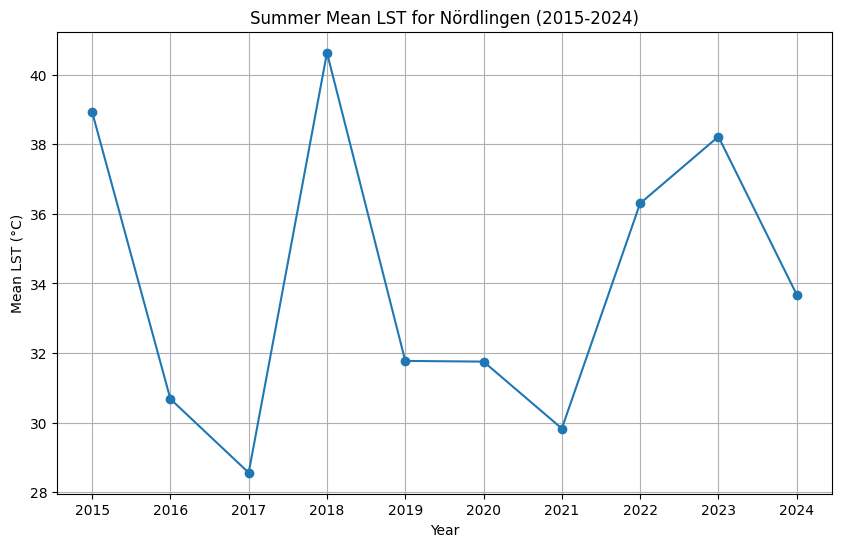

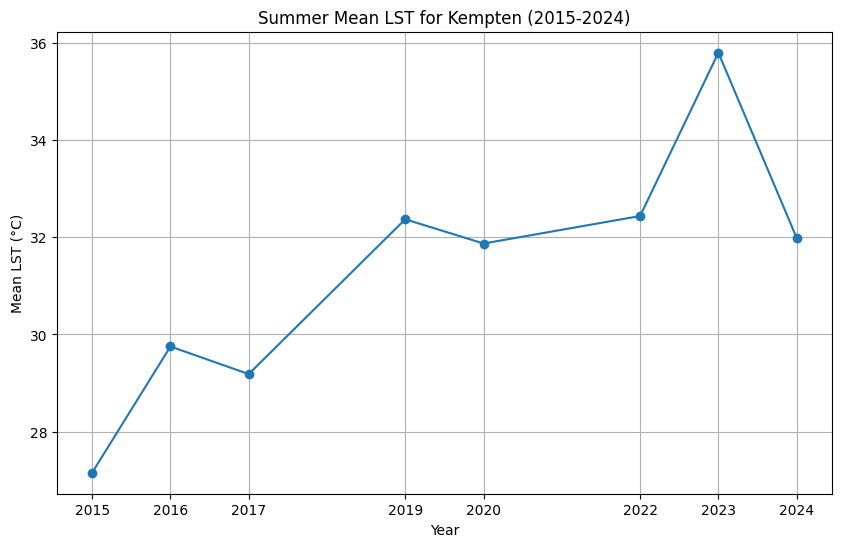

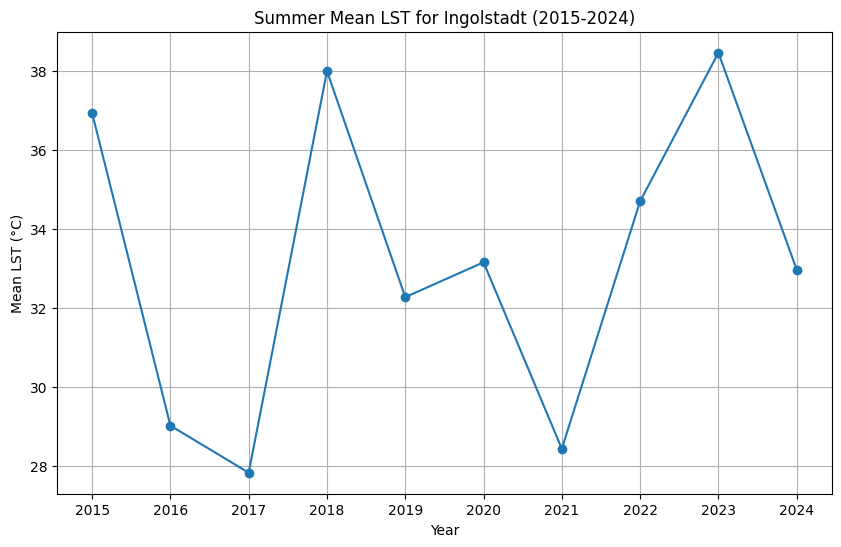

In [ ]:
# Assuming city_yearly_means is your dictionary from the previous code

# Create separate charts for each city
for city_name, yearly_means in city_yearly_means.items():
    years = list(yearly_means.keys())
    lst_values = list(yearly_means.values())

    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.plot(years, lst_values, marker='o', linestyle='-')  # Plot with markers and lines
    plt.title(f'Summer Mean LST for {city_name} (2015-2024)')
    plt.xlabel('Year')
    plt.ylabel('Mean LST (°C)')
    plt.grid(True)
    plt.xticks(years)  # Set x-axis ticks to show all years
    plt.show()

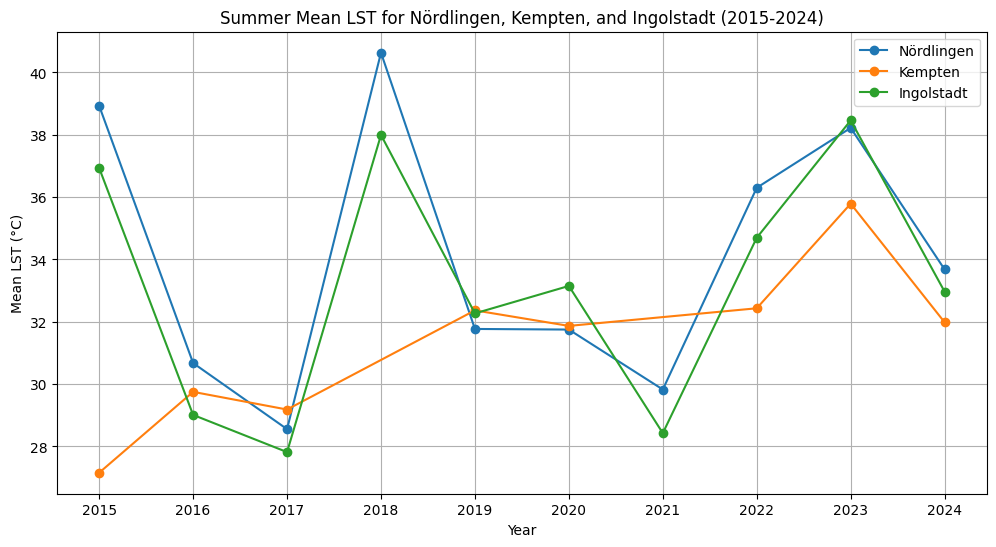

In [ ]:
# Assuming city_yearly_means is your dictionary from the previous code

plt.figure(figsize=(12, 6))  # Adjust figure size as needed

for city_name, yearly_means in city_yearly_means.items():
    years = list(yearly_means.keys())
    lst_values = list(yearly_means.values())

    plt.plot(years, lst_values, marker='o', linestyle='-', label=city_name)  # Add label for legend

plt.title('Summer Mean LST for Nördlingen, Kempten, and Ingolstadt (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Mean LST (°C)')
plt.grid(True)
plt.xticks(years)  # Set x-axis ticks to show all years
plt.legend()  # Add legend to differentiate cities
plt.show()

Graphen auch für Frühling, Herbst, Winter

# NDVI Sommer 2022